## Arbitrage − Riskless profit

### Definition
<b>Simple practical case</b><br/>
Arbitrage exists if two identical goods have a different price: the first price is lower than the second.<br/>
So you can make `riskless profit` by buying one for the first price and selling the exact same thing for the second price.

<b>Generalized theoretical definition</b><br/>
Making `riskless profit` by changing your portfolio one full circle along a closed directed path<br/>
of portfolio change steps in the space of all possible portfolios.

#### Task: Alternative exchange steps
Without fees and expenses, what is the expected relative amount one can make by exchanging USD to ETH via BTC ?

Let's denote the BTC vs USD exchange rate by $\,\mathrm{BTC}\,/\,\mathrm{USD}\,$.

With minute-resolution exchange rate plot the time series 
$\,A\,(\,t\,)=\displaystyle{\frac{\mathrm{ETH}\,/\,\mathrm{BTC} \cdot \mathrm{BTC}\,/\,\mathrm{USD}}{\mathrm{ETH}\,/\,\mathrm{USD}}}\,$.

1. In a perfect world what would you expect this number to be ?

2. Calculate and plot $\,A\,(\,t\,)\,$, and `discuss the plot`.

###### Download cryptocurrency exchange rates and trading volumes
1. Please register at kaggle.com and go to https://www.kaggle.com/tencars/392-crypto-currency-pairs-at-minute-resolution.
2. Download to the `data` subfolder of the current directory the files for the currency pairs ethbtc, btcusd and ethusd.
3. Double-check that you have the following downloaded files: `ethbtc.csv.zip`, `btcusd.csv.zip`, `ethusd.csv.zip`.

###### Read data

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path


def read_and_transform_crypto_data():
    # FX (exchange rates): read the dataframes from the files 
    # etcbtc.csv.zip, btcusd.csv.zip, ethusd.csv.zip
    fx = {pair: pd.read_csv(Path('data').joinpath(pair + '.csv.zip').resolve()) 
          for pair in ('ethbtc', 'btcusd', 'ethusd')}

    # except for the "time" column, prepend to each data column name the name of the currency pair
    def column_name_mapping(columns, tag):
        return {col: col if col == 'time' else tag + '_' + col for col in columns}

    [df.rename(columns = column_name_mapping(df.columns, pair), inplace=True) 
     for pair, df in fx.items()]

    # fxm (fx merged): merge dataframes based on the 'time' column
    fxm = fx['ethbtc'].merge(fx['btcusd'], on='time').merge(fx['ethusd'], on='time')

    return fxm


# read_and_transform_crypto_data()

###### Calculate and Plot A ( t )

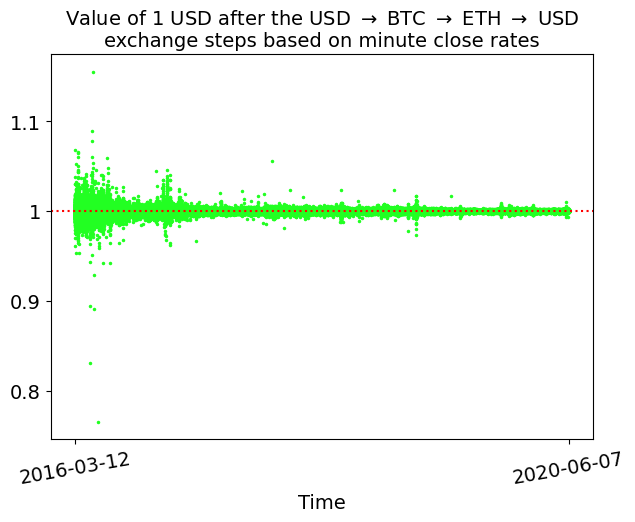

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fontsize = 14
yticks = {y: f'{y:.2g}' for y in [0.8, 0.9, 1, 1.1]}


def plot_crypto_pairs_arbitrage(fxresult=None):
    plt.plot(fxresult, c='#2f2', linewidth=0, marker='.', markersize=3)
    plt.title(('Value of 1 USD after the USD $\\rightarrow$ BTC $\\rightarrow$ ETH $\\rightarrow$ USD\n'
               'exchange steps based on minute close rates'), fontsize=fontsize)
    plt.xlabel('Time', fontsize=fontsize)
    ax = plt.gca()
    ax.set_xticks([0, len(fxm['time'])], ['2016-03-12', '2020-06-07'], fontsize=fontsize, rotation=10)
    ax.set_yticks(list(yticks.keys()), list(yticks.values()), fontsize=fontsize)
    plt.axhline(1, c='r', ls='dotted')

    fig = plt.gcf()
    fig.set_size_inches([7, 5])
    plt.show()


fxm = read_and_transform_crypto_data()
plot_crypto_pairs_arbitrage(fxm['ethbtc_close'] * fxm['btcusd_close'] / fxm['ethusd_close'])

## Efficient market hypothesis (EMH)
<b>Theoretical definition</b><br/>
All information is instantaneously available to everyone, and from this information everyone makes the same conclusions.<br/>
Therefore, in the long time limit there is no trading strategy whose profit is on average above the risk-free rate.

<b>Practical definition</b><br/>
Arbitrage opportunities are removed quickly because the market is dominated by well-informed rationally acting participants.

<b>Warning</b><br/>
The EMH is a simplified approximation of real markets.<br/>
It can provide guidance, but its results can differ significantly from actual observed market behaviors. 

## Modern Portfolio Theory (MPT, 1952)

The MPT is also called Markowitz Portfolio Theory after [the 1952 paper](https://www.jstor.org/stable/2975974) of Harry Markowitz.<br/>
The MPT is a `mean-variance` analysis theory.


A `portfolio` is a collection of financial assets, for example, 10 shares of stock A and 90 shares of stock B.
<br/>
In this example stock A and stock B are called the `constituent assets` of the portfolio.

For theoretical work the sum of the weights is normalized to 1.<br/>
In the example, we have 0.1 units of stock A and 0.9 units of stock B.

### Outline

The MPT connects the risk of a portfolio with its expected return based on the following assumptions:

1. Market participants optimize the weights of their portfolio constituents<br/>
to `minimize the risk` and to `maximize the expected return` of the portfolio.
2. In the simplest case it is assumed for all constituent assets that their<br/>
expected returns and covariances are `known` and are `constants` in time.
3. Portfolio `risk is quantified` as the yearly variance (or volatility) of the portfolio.

###### Comments

* The MPT is a `two-moment` decision model. It uses the first two moments: the means and the covariances.



* The variance of the $\,k$th asset is the $\,k$th number in the main diagonal of the covariance matrix.



* Recall that the `volatility` (also called: standard deviation) is the square root of the `variance`.



* With the MPT it is also assumed that based on the expected return we can calcuate present values with `discounting`.
<br/>One `practical goal` of the theory is to `calculate PVs` as precisely as possible.

### Efficient Frontier of assets that have non-zero risk (risky assets)

#### Tools for the mean-variance analysis

###### Linear algebra refresher − Notations for scalars and tensors (vectors, matrices)

*Scalar and tensor*
* A `tensor` is a variable with indexes:
  * a vector has one `index`, for example, the vector $\,\mathbf{w}\,$ has the index $\,i\,$ with the possible values $\,1,\,2,\,\dots,\,N\,$,
  * a matrix has two indexes, for example, the correlation matrix $\,\boldsymbol{c}\,$ has the indexes $\,j\,$ and $\,k\,$, both with possible values $\,1,\,2,\,\dots,\,N\,$.


* A `scalar` is a variable with _no_ indexes, for example, the function
$\,f\left(\,\mathbf{w}\,\right) = \left(\,\sum_{\,i=1}^{N}w_{\,i}^{\,2}\,\,\right)^{1\,\mathit{/}\,2}$ 
is a scalar function of the vector $\,\mathbf{w}\,$.

*Transposition*

* If the $\,k$th index of tensor $\,\mathbf{a}\,$ has the possible values $\,1,\,2,\,\dots,\,N\,$, then the $\,k$th `dimension` of that tensor is $\,N\,$.

* If $\,\mathbf{a}\,$ is a vector or a matrix, then $\,\mathbf{a}^\mathrm{\,T}\,$ is the `transposition` of $\,\mathbf{a}\,$. 
  * If $\,\mathbf{a}\,$ is a row vector, then $\,\mathbf{a}^\mathrm{\,T}\,$ is a column vector.

*Dot product ($\,\cdot\,$) and dyadic product ($\,\circ\,$)*

* If $\,\mathbf{a}\,$ and $\,\mathbf{b}\,$ are both row vectors, then $\,\mathbf{a} \cdot \mathbf{b}^\mathrm{\,T}\,$ is their `dot product`, which is a scalar.
  * The dot product can be also written without the $\,\cdot\,$ sign, for example, $\,\mathbf{a} \, \mathbf{b}^\mathrm{\,T}\,$.
* If $\,\mathbf{a}\,$ and $\,\mathbf{b}\,$ are both row vectors, then $\,\mathbf{a}^\mathrm{\,T} \circ\, \mathbf{b}\,$ is their `dyadic product`, which is a matrix.

*Properties of transposition*

* If $\,\mathbf{a}\,$ and $\,\mathbf{b}\,$ are both matrices, and the second dimension of $\,\mathbf{a}\,$ equals the first dimension of $\,\mathbf{b}\,$,<br/>
then their `matrix dot product` is the matrix $\,\mathbf{c} = \mathbf{a} \, \mathbf{b}\,$
where $\,c_{\,i\,j} = \sum_{k} a_{\,i\,k} \, b_{\,k\,j}\,$.
* The transposition of the product of two matrices is 
$\,\left(\,\mathbf{a} \, \mathbf{b}\,\right)^\mathrm{\,T} = \,\mathbf{b}^\mathrm{\,T} \, \mathbf{a}^\mathrm{\,T}\,$.
* If a matrix is symmetric (transposition does not change it), then its inverse is also symmetric.

*The 1-vector and the nullvector*

* Let $\,\mathbf{1}\,$ denote the $\,N$-dimensional row vector with all $\,1\,$ values: $\,\mathbf{1}=\left(\,1,\,1,\,\dots,\,1\,\right)\,$ . 

* Let the $\,\mathbf{0}\,$ `null vector` denote the $\,N$-dimensional row vector with all $\,0\,$ values: $\,\mathbf{0}=\left(\,0,\,0,\,\dots,\,0\,\right)\,$ .

###### Finance terms

*Portfolio, asset weights and returns*

* Consider a `portfolio` with $\,N\,$ assets.

* The `weights` of the assets are $\,\mathbf{w}=\left(\,w_{\,1},\,w_{\,2},\,\dots,\,w_{\,N}\,\right)\,$, and
the sum of asset weights is $\,\mathbf{w}\,\mathbf{1}^\mathrm{\,T}=1\,$.

* The yearly expected `returns` of the asset prices are $\,\mathbf{r}=\left(\,r_{\,1},\,r_{\,2},\,\dots,\,r_{\,N}\,\right)\,$.


*Covariance*

* The covariance is usually calculated between the `daily log returns` of the asset prices, not the asset prices themselves.

* The covariance of the $\,j$th and $\,k$th assets is $\,c_{\,j\,k}=c_{\,k\,j}\,$, and the entire `covariance matrix` is $\,\mathbf{c}\,$.

* The variance of the $\,k$th asset is $\,c_{\,k\,k}\,$.


*Yearly expected return and variance*

* The `portfolio's yearly expected return` is $\,\mathbf{w}\,\mathbf{r}^\mathrm{\,T}\,$. 

* The `portfolio's yearly variance` is $\,\sigma^\mathrm{\,2}=\mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T}$.

###### Linear algebra refresher $-$ About inverting the covariance matrix

*Eigenvalue and eigenvector*

* The covariance matrix, $\,\mathbf{c}\,$, is an $\,N \times N\,$ real-valued square matrix.

* The $\,k$th eigenvalue and row eigenvector of $\,\mathbf{c}\,$ are denoted by 
$\,\lambda_k\,$ and $\,\mathbf{e}^{\,(k)}=\left(\,e^{\,(k)}_{\,1},\,\dots,\,e^{\,(k)}_{\,N}\,\right)\,$.
  * Note that the length of each eigenvector is 1, in other words: $\,\sum_{j=1}^{N} \!\left(e^{\,(k)}_{\,j}\right)^2=1\,$ for each $\,k\,$.


*Projector decomposition*

* As $\,\mathbf{c}\,$ is a real-valued, symmetric matrix, it always does have a full orthonormal basis of eigenvectors.<br/>
In other words, the normalized $\,\mathbf{e}^{\,(k)}\,$ eigenvectors of $\,\mathbf{c}\,$ can always be selected to be orthogonal.<br/>
For a detailed explanation please see, for example, https://math.stackexchange.com/questions/82467.



* The matrix $\,\boldsymbol{\mathcal{P}}^{(k)}=\left(\mathbf{e}^{\,(k)}\right)^\mathrm{\,T} \circ \, \mathbf{e}^{\,(k)}\,$ is a `projector` to the direction (subspace) defined by $\,\mathbf{e}^{\,(k)}\,$:
  * If $\,\mathbf{a}^\mathrm{\,T}\,$ is a column vector, then  $\,\boldsymbol{\mathcal{P}}^{(k)} \,\, \mathbf{a}^\mathrm{\,T}\,$ is the component of $\, \mathbf{a}^\mathrm{\,T}\,$ parallel to $\,\mathbf{e}^{\,(k)}\,$. 
  * In other words, $\,\boldsymbol{\mathcal{P}}^{(k)}\,$ removes all components of $\, \mathbf{a}^\mathrm{\,T}\,$ that are not parallel to $\,\mathbf{e}^{\,(k)}\,$.

* The `projector decomposition` of a real-valued symmetric $\,\mathbf{c}\,$ matrix is 
$\,\displaystyle{\mathbf{c}=\sum_{k=1}^{N} \lambda_k \, \boldsymbol{\mathcal{P}}^{(k)}  }\,$.

*A projector matrix cannot be inverted*

* If  $\,\lambda_k=0\,$, then the projector decomposition of $\,\mathbf{c}\,$ shows that $\,\mathbf{c}\,$ itself is projector as well,<br/>
because the component of $\,\mathbf{a}^\mathrm{\,T}\,$ that is parallel to $\,\mathbf{e}^{\,(k)}\,$
is multiplied by $\,\lambda_k=0\,$ in the dot product $\, \mathbf{c} \,\, \mathbf{a}^\mathrm{\,T}\,$. <br/>
In other words, a matrix with a zero eigenvalue removes a vector's component parallel to the corresponding eigenvector.


* In summary, `if the covariance matrix does have a zero eigenvalue, then it cannot be inverted`.

* In practice, eigenvalues very close to zero have the same effect.


###### Vector analysis refresher

*Nabla*

* The $\,\boldsymbol{\nabla}\,$ operator is called `nabla`.

* If $\,f\left(\,\mathbf{x}\,\right)\,$ is a scalar function of the vector 
$\,\mathbf{x}=\left(\,x_{\,1},\,\dots,\,x_{\,N}\,\right)\,$, 
then $\,\boldsymbol{\nabla}\,f\,$ denotes the row vector 
$\,\displaystyle{\left(\frac{\partial\,f}{\partial\,x_{\,1}},\,\dots,\,\frac{\partial\,f}{\partial\,x_{\,N}}\right)}\,$.

*Lagrangian*

* If $\,f\left(\,\mathbf{x}\,\right)\,$ and $\,g\left(\,\mathbf{x}\,\right)\,$ are both scalar functions of the 
vector $\,\mathbf{x}\,$,<br/>
and we are searching for the global minimum of $\,f\left(\,\mathbf{x}\,\right)\,$ with the constraint $\,g\left(\,\mathbf{x}\,\right)=0\,$,<br/>
then with a new scalar variable $\,\lambda\,$ and the scalar `Lagrange function` 
$\,\mathcal{L}\,\left(\,\mathbf{x},\,\lambda\,\right) = 
f\left(\,\mathbf{x}\,\right) - \lambda\,g\left(\,\mathbf{x}\,\right)\,$<br/>
a `necessary condition` for a local minimum of $\,f\left(\,\lambda\,\right)\,$ is
$\,\mathbf{0}=\,\boldsymbol{\nabla}\,\mathcal{L}\,\left(\,\mathbf{x},\,\lambda\,\right)\,$.


* Note that $\,\mathcal{L}\,$ is a function of $\,\left(\,\mathbf{x},\,\lambda\,\right)\,$, not only $\,\mathbf{x}\,$,
therefore,<br/>
here $\,\boldsymbol{\nabla}\,$ differentiates with respect to not only $\,\mathbf{x}\,$, but the entire $\,N+1\,$ dimensional variable vector $\,\left(\,\mathbf{x},\,\lambda\,\right)\,$ of $\,\mathcal{L}\,$.

#### Description of the task

###### Compact description

With a fixed portfolio return minimize the variance of the portfolio.

###### Detailed description

1. Assume that the asset returns and covariances ($\,\mathbf{r}\,$ and $\,\mathbf{c}\,$) are all known and constant.

2. Select a constant $\,q\,$ yearly expected return of the portfolio.

3. Find the non-negative asset weights $\,\mathbf{w}\,$ that minimize 
$\,\mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T}$ 
<br/>with the conditions
$\,\mathbf{w}\,\mathbf{1}^\mathrm{\,T}-1=0\,$ 
and $\,\mathbf{w}\,\mathbf{r}^\mathrm{\,T}-q=0\,$.

4. For all cases when a solution exists plot the function connecting $\,q\,$ with 
$\,\sigma^{\,2}=\mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T}\,$.

###### Alternative description

With a fixed portfolio variance maximize the return of the portfolio.

#### Derivation with the Lagrange method

###### Before we start please note the following
* Below is an analysis of the `necessary condition` for the global minimum.
* The sufficient condition for the local minimum is not explicitly analyzed here.
* After some reasoning, one of the two local minima will be selected for the $\,\sigma^{\,2}\left(\,q\,\right)\,$ function,<br/>and it will be inverted to obtain the $\,q\left(\,\sigma^{\,2}\,\right)\,$ function.


* l.h.s. means: left hand side of the equation
* r.h.s. means: right hand side of the equation


##### Equations defining the necessary condition of the local minimum

Following the description of the task and the Lagrange method, let's apply two new scalar variables,
$\,-\lambda_{\,\mathrm{1}}\,$ and $\,-\lambda_{\,\mathrm{q}}\,$,
<br/>
and `minimize the Lagrange function` 
$\,\mathcal{L}\,\left(\,\mathbf{w},\,\lambda_{\,\mathrm{1}},\,\lambda_{\,\mathrm{q}}\,\right)
= \mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T} 
- \lambda_{\,\mathrm{1}}\left(\,\mathbf{w}\,\mathbf{1}^\mathrm{\,T}-1\,\right)
- \lambda_{\,\mathrm{q}}\left(\,\mathbf{w}\,\mathbf{r}^\mathrm{\,T}-q\,\right)\,$.

The necessary $\,\mathbf{0}=\,\boldsymbol{\nabla}\,\mathcal{L}\,$ 
condition for a $\,\left(\,\mathbf{w},\,\lambda_{\,\mathrm{1}},\,\lambda_{\,\mathrm{q}}\,\right)\,$ 
vector to be the location of a local minimum has three parts :

$(1)$ $\,\,\,$ 
$
\mathbf{0} = \displaystyle{\frac{\partial\,\mathcal{L}}{\partial\,\mathbf{w}}} = 
\mathbf{c}\,\mathbf{w}^\mathrm{\,T} - 
\lambda_{\,\mathrm{1}}\,\mathbf{1}^\mathrm{\,T} - 
\lambda_{\,\mathrm{q}}\,\mathbf{r}^\mathrm{\,T} 
$

$(2)$ $\,\,\,$ 
$
0 = \displaystyle{\frac{\partial\,\mathcal{L}}{\partial\,\lambda_{\,\mathrm{1}}}} = 1-\mathbf{w}\,\mathbf{1}^\mathrm{\,T}
$

$(3)$ $\,\,\,$ 
$
0 = \displaystyle{\frac{\partial\,\mathcal{L}}{\partial\,\lambda_{\,\mathrm{q}}}} = 
q-\mathbf{w}\,\mathbf{r}^\mathrm{\,T}
$

Note that 

* while $\,(1)\,$ is a set of $\,N\,$ equations, $\,(2)\,$ and $\,(3)\,$ are both only 1 equation each,

* the full set of $\,(1)\,$, $\,(2)\,$, $\,(3)\,$ has $\,N+2\,$ equations and $\,N+2\,$ unknowns,

* the $\,N+2\,$ unknowns are $\,\lambda_{\,\mathrm{1}}\,$, $\,\lambda_{\,\mathrm{q}}\,$, and the $\,\mathbf{w}\,$ weights.

##### Solving the equations

###### If the Covariance matrix is big or has at least one eigenvalue close to zero

If $\,N > 10\,$ or the covariance matrix has at least one eigenvalue that is close to zero, 
then do not try to invert it. In this case
1. select from the $\,\mathbf{r}\,$ vector the lowest and the highest of the yearly asset returns,
2. between this minimum and maximum select 100 (or 200, as you prefer) linearly spaced $\,q\,$ values 
3. with each $\,q\,$ value as a parameter, numerically solve the equation set $\,\left(\,1,\,2,\,3\,\right)\,$ for the variables $\,\left(\,\mathbf{w},\,\lambda_{\,\mathrm{1}},\,\lambda_{\,\mathrm{q}}\,\right)\,$,
4. for each $\,q\,$ use the obtained $\,\mathbf{w}\,$ to calculate the variance $\,\sigma^{\,2}=\mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T}\,$,
5. fit to these numerically calculated $\,\sigma^{\,2}\,$ values the parameters of the $\,\sigma^{\,2}\left(\,q\,\right)\,$ curve shown in equation $\,(18)\,$ below,
6. with the same parameters plot the $\,q\left(\,\sigma^{\,2}\,\right)\,$ efficient frontier shown in equation $\,(19)\,$.

###### Solution for a Small Invertible Covariance matrix

If the covariance matrix is small and its eigenvalues are all far from zero,<br/>
then the efficient frontier can be analytically derived in the following way.<br/>

For the result, please see equation $\,(19)\,$ below.

_`Calculation of the Asset Weights`_

To solve for $\,\mathbf{w}\,$, first multiply $\,(1)\,$ with the inverse of $\,\mathbf{c}\,$ from the left:

$(4)$ $\,\,\,$  $\mathbf{w}^\mathrm{\,T} = 
\lambda_{\,\mathrm{1}}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T} +
\lambda_{\,\mathrm{q}}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}\,$ ,

and then transpose both sides of $\,(4)\,$. 
Since $\,\mathbf{c}\,$ is symmetric, $\,\mathbf{c}^\mathrm{\,-1}\,$ is also symmetric:

$(5)$ $\,\,\,$  $\mathbf{w} =
\lambda_{\,\mathrm{1}}\,\,\mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1} +
\lambda_{\,\mathrm{q}}\,\,\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,$  .

<br/>

Next, multiply $\,(5)\,$ with $\,\mathbf{1}^\mathrm{\,T}\,$ from the right, and 
apply $\,(2)\,$ to replace $\,\mathbf{w}\,\mathbf{1}^\mathrm{\,T}\,$ on the l.h.s. with the number $\,1\,$:

$(6)$ $\,\,\,$ $1 = 
\lambda_{\,\mathrm{1}}
\left(\,\mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}\,\right) +
\lambda_{\,\mathrm{q}}
\left(\,\color{red}{\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}}\,\right)\,$.

Now multiply $\,(5)\,$ with $\,\mathbf{r}^\mathrm{\,T}\,$ from the right and 
apply $\,(3)\,$ to replace $\,\mathbf{w}\,\mathbf{r}^\mathrm{\,T}\,$ on the l.h.s. with $\,q\,$:

$(7)$ $\,\,\,$ $q = 
\lambda_{\,\mathrm{1}}
\left(\,\color{red}{\mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}}\,\right) +
\lambda_{\,\mathrm{q}}
\left(\,\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}\,\right)\,$.

Remember that $\,\mathbf{c}^\mathrm{\,-1}\,$ is symmetric, therefore, the two red numbers are identical: 
$\,
\color{red}{\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}} =
\mathbf{r}\,\left(\,\mathbf{c}^\mathrm{\,-1}\,\right)^\mathrm{\,T}\,\mathbf{1}^\mathrm{\,T} =
\color{red}{\mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}}
\,$.


Combining $\,(6)\,$ and $\,(7)\,$ gives a $\,2 \times 2\,$ linear equation system:

$(8)$ $\,\,\,$ 
$
\begin{pmatrix}
1 \\ 
q
\end{pmatrix}
=
\begin{pmatrix}
\,
\mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,\,\,\,\,\, 
\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,
\\
\,
\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,\,\,\,\,\,
\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}
\,
\end{pmatrix}
\begin{pmatrix} 
\lambda_{\,\mathrm{1}} \\
\lambda_{\,\mathrm{q}}
\end{pmatrix}
$

On the right hand side of $\,(8)\,$ define

$A = 
\begin{pmatrix}
\,
\mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,\,\,\,\,\, 
\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,
\\
\,
\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,\,\,\,\,\,
\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}
\,
\end{pmatrix}
$


Also in $\,(8)\,$, define the two row vectors
$\,\mathbf{h}=\left(\,\lambda_{\,\mathrm{1}},\,\lambda_{\,\mathrm{q}}\,\right)\,$
and $\,\mathbf{q}=\left(\,1,\,q\,\right)\,$.


With these definitions, $\,(8)\,$ can be written as $\,\mathbf{q}^\mathrm{\,T}=\mathbf{A}\,\mathbf{h}^\mathrm{\,T}\,$.
Multiply this by $\,\mathbf{A}^{\,-1}\,$ from the left:

$(9)$ $\,\,\,$ 
$\,\mathbf{A}^{\,-1}\,\mathbf{q}^\mathrm{\,T}=\mathbf{h}^\mathrm{\,T}\,$.

Now transpose both sides of $\,(9)\,$. Since $\,\mathbf{A}\,$ is symmetric, $\,\mathbf{A}^{\,-1}\,$ is also symmetric, and $\,(9)\,$ is equivalent to

$(10)$ $\,\,\,$ 
$\,\mathbf{h}=\mathbf{q}\,\,\mathbf{A}^{\,-1}\,$.

Inserting this $\,\mathbf{h}=\left(\,\lambda_{\,\mathrm{1}},\,\lambda_{\,\mathrm{q}}\,\right)\,$ vector back into $\,(5)\,$ gives the asset weights.

_`Calculation of Portfolio Variance`_

Multiply equation $\,(5)\,$ from the right with $\,\mathbf{c}\,$. This gives

$
\mathbf{w}\,\mathbf{c}
=
\lambda_{\,\mathrm{1}}\,\,\mathbf{1} + \lambda_{\,\mathrm{q}}\,\,\mathbf{r}
\,$.

Now multiply the l.h.s. of this equation with the l.h.s. of $\,(4)\,$, and the r.h.s. of this equation with the r.h.s. of $\,(4)\,$.

The resulting equation will show the variance of the portfolio:

$(11)$ $\,\,\,$ $\,
\sigma^\mathrm{\,2}
=
\mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T} 
=
\big(\,\lambda_{\,\mathrm{1}}\,\,\mathbf{1} + \lambda_{\,\mathrm{q}}\,\,\mathbf{r}\,\big)
\,
\big(\,\lambda_{\,\mathrm{1}}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T} +
\lambda_{\,\mathrm{q}}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}\,\big) 
\,$.

Note that in $\,(11)\,$ the same $\,\mathbf{A}\,$ matrix and the same $\,\mathbf{h}\,$ vector appear that were defined at $\,(8)\,$.

Thus, the r.h.s. of $\,(11)\,$ can be simplified:

$(12)$ $\,\,\,$ $\,\mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T} =
\mathbf{h}\,\,\mathbf{A}\,\,\mathbf{h}^\mathrm{\,T}\,$

On the r.h.s. of $\,(12)\,$ inserting $\,\mathbf{h}^\mathrm{\,T}\,$ from $\,(9)\,$
and $\,\mathbf{h}\,$ from $\,(10)\,$ gives that 

$(13)$ $\,\,\,$ the `portfolio's variance` is 
$\,\,\,$ 
$\sigma^\mathrm{\,2}
=
\left(\,\mathbf{q}\,\,\mathbf{A}^{\,-1} \right)
\mathbf{A}\
\left(\,\mathbf{A}^{\,-1}\,\mathbf{q}^\mathrm{\,T} \right)
=
\mathbf{q}\,\,\mathbf{A}^{\,-1}\,\mathbf{q}^\mathrm{\,T}\,$.

_`Calculation of the Expected Return of the Portfolio`_

Denote the entries of matrix $\,\mathbf{A}\,$ by

$(14)$ $\,\,\,$ $
A_{\,11} = \mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,\, , \,\,\,\,\,\,
A_{\,12} = A_{\,21} = \mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,\, , \,\,\,\,\,\,
A_{\,22} = \mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}
\,\, .
$

With these notations the inverse of $\,\mathbf{A}\,$ is

$(15)$ $\,\,\,$ $
\mathbf{A}^{\,-1} = \displaystyle{\frac{1}{A_{\,11} A_{\,22} - \left(\,A_{\,12}\,\right)^{\,2}}}\,
\begin{pmatrix} 
A_{\,22} \,\,\,\,\, -\!A_{\,12} \\
-A_{\,12} \,\,\,\,\, A_{\,11} \\
\end{pmatrix}\,$.

<br/>

Next, recall that $\,\mathbf{q}=\left(\,1,\,q\,\right)\,$, and use the notations of $\,(14)\,$ and $\,(15)\,$.<br/>

The portfolio variance in $\,(13)\,$ is a quadratic polynomial of the expected return, $\,q\,$:

$(16)$ $\,\,\,$ $ 
\sigma^\mathrm{\,2}\left(\,q\,\right)
=
\mathbf{q}\,\,\mathbf{A}^{\,-1}\,\mathbf{q}^\mathrm{\,T}
=
\displaystyle{\frac{ q^{\,2} \,A_{\,11} +
q \, \left(\,-2\, A_{\,12}\,\right) + A_{\,22}
}{A_{\,11} A_{\,22} - \left(\,A_{\,12}\,\right)^{\,2}}}\,$.

To simplify $\,(16)\,$, use the following definitions: 

$(17)$ $\,\,\,$ 
$
\displaystyle{\frac{1}{K^{\,2}}=\frac{1}{A_{\,22} - \left(\,A_{\,12}\,\right)^{\,2} \, \mathit{/} \, A_{\,11}}}
\,\, , \,\,\,\,\,\,
q_{\,0}=\displaystyle{\frac{A_{\,12}}{A_{\,11}}}
\,\, , \,\,\,\,\,\,
\sigma_{\,0}^\mathrm{\,2}=\displaystyle{\frac{1}{A_{\,11}}}
\,$.

With the definitions of $\,(17)\,$ the variance from $\,(16)\,$ is simplified to

$(18)$ $\,\,\,$ 
$\displaystyle{\sigma^\mathrm{\,2}\left(\,q\,\right)=\frac{1}{K^{2}}\,\left(\,q-q_{\,0}\,\right)^{\,2} + \sigma_{\,0}^\mathrm{\,2}}\,$.

<br/>

In other words, the necessary condition for having a minimal variance as a function of the selected yearly return
<br/>
is that the variance lies on a parabolic curve as a function of the yearly return.

In $\,(18)\,$ observe that the $\,q\left(\,\sigma^\mathrm{\,2}\,\right)\,$ solutions are $\,q_{\,0} \pm K\,\sqrt{\sigma^\mathrm{\,2}-\sigma_{\,0}^\mathrm{\,2}\,}\,$, and the value with the $\,+\,$ sign is always higher.

##### Analytical result: Parabolic curve

With a `fixed portfolio variance`, a `rational investor` selects the higher return, 
<br/>therefore, we keep only the higher $\,q\left(\,\sigma^\mathrm{\,2}\,\right)\,$ value:


$\color{red}{(19)}$ $\,\,\,$ 
the `portfolio's expected return` is $\,\,\,$ 
$\color{red}{q\left(\,\sigma^\mathrm{\,2}\,\right)=q_{\,0} + K\,\sqrt{\sigma^\mathrm{\,2}-\sigma^\mathrm{\,2}_{\,0}\,}}\,$ $\,\,\,$ with $\,\,\,$ $\color{red}{\sigma^\mathrm{\,2}\ge\sigma^\mathrm{\,2}_{\,0}}\,$.

#### Efficient Frontier of Risky Assets only

Calculate the efficient frontier for a portfolio that contains `stocks only`, and exclude all other forms of investment.

`Matrix operations refresher: Pivoting a table`

Pivot: one of the two vertical lists is turned (moved, rotated) up to horizontal position.
<br/>Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html

In [3]:
import pandas as pd
from IPython.display import display, HTML

# original table
df = pd.DataFrame({'name': ['guppy', 'whale', 'mouse', 'tiger'],
                   'feet': [0, 0, 4, 4],
                   'size': ['small', 'big', 'small', 'big']})
display(HTML(df.to_html(index=False)))

# pivot table
display(df.pivot(index='feet', columns='size', values='name'))

name,feet,size
guppy,0,small
whale,0,big
mouse,4,small
tiger,4,big


size,big,small
feet,,
0,whale,guppy
4,tiger,mouse


##### Read and format a data set

1. From [this kaggle page](https://www.kaggle.com/dgawlik/nyse?select=prices-split-adjusted.csv) download the file `prices-split-adjusted.csv.zip` to the `data` subfolder of your current directory.
2. Select a year and read data from the last business day of the previous year until the last business day of the selected year.
3. Put the daily closing values of each ticker symbol (A, AAL, AAP, AAPL, ...) into a separate column.

In [4]:
import pandas as pd
import pathlib

SELECTED_YEAR = 2011
FILE_PATH = pathlib.Path('data').joinpath('prices-split-adjusted.csv.zip')  # data file


def read_prices(file_path=None, selected_year=None):
    """
    Read prices for the selected year and the last day of the previous year,
    and convert the dataframe for further processing.
    """

    p = pd.read_csv(file_path.resolve())[['date', 'symbol', 'close']]  # p: prices
    p.date = pd.to_datetime(p.date)
    p['year'] = [this_date.year for this_date in p.date]    
    p_grouped = p.groupby(p.year)
    last_day_previous_year = (p_grouped.get_group(selected_year - 1).date.max()
                              if selected_year - 1 in p_grouped.groups else None)
    last_day_selected_year = (p_grouped.get_group(selected_year).date.max()
                              if selected_year in p_grouped.groups else None)
    assert last_day_previous_year is not None, (f'Last day of previous year is {last_day_previous_year}')
    assert last_day_selected_year is not None, (f'Last day of selected year is {last_day_selected_year}')

    p_selected = p[(last_day_previous_year <= p.date) & (p.date <= last_day_selected_year)]
    p_selected_transformed = p_selected.pivot(index='date', columns='symbol', values='close')
    
    return p_selected_transformed


prices = read_prices(file_path=FILE_PATH, selected_year=SELECTED_YEAR)
display(prices)

symbol,A,AAL,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,ADM,...,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZBH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,29.635193,10.01,66.150002,46.080002,34.119999,22.987198,48.490002,30.780001,37.669998,30.080000,...,23.549999,21.820000,28.980000,73.120003,34.169998,11.52,16.629999,35.262403,53.680000,24.230000
2011-01-03,29.957081,10.65,65.500000,47.081429,34.320000,22.944016,48.590000,31.290001,37.950001,30.400000,...,23.559999,22.160000,29.420000,74.550003,35.099998,11.71,16.750000,35.291157,54.970001,25.170000
2011-01-04,29.678112,10.62,62.240002,47.327145,33.939999,23.159926,48.270000,31.510000,37.520000,30.379999,...,23.660000,22.049999,29.540001,74.900002,34.709999,11.40,16.590000,34.751977,54.240002,24.760000
2011-01-05,29.613733,11.10,62.320000,47.714287,34.459999,23.159926,48.279999,32.220001,37.599998,30.520000,...,23.520000,22.170000,29.639999,74.699997,35.040001,11.46,16.910000,34.917325,54.279999,24.900000
2011-01-06,29.670958,11.24,60.270000,47.675713,34.860001,23.111945,48.459999,32.270000,37.810001,31.690001,...,23.500000,22.160000,30.139999,75.180000,34.840000,11.46,17.059999,35.161756,52.599998,24.830000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-23,25.293276,5.62,70.250000,57.618572,37.419998,26.878371,52.889999,28.290001,36.209999,29.059999,...,27.200001,20.270000,32.349998,85.220001,35.630001,8.29,16.190001,42.437096,53.209999,16.330000
2011-12-27,25.214592,5.40,70.919998,58.075714,37.709999,26.979130,52.930000,28.500000,36.380001,29.040001,...,27.620001,20.170000,32.290001,85.279999,35.529999,8.16,16.090000,42.631200,53.279999,16.400000
2011-12-28,24.399142,5.19,70.260002,57.520000,36.830002,26.787210,52.860001,28.020000,35.599998,28.370001,...,27.459999,19.719999,31.969999,84.180000,34.849998,7.90,15.780000,42.401151,53.160000,16.090000


##### Returns and the covariance matrix

1. Calculate the `yearly percent return` of each stock over the entire available time period.


2. Make the `covariances` independent from the returns:

  a. For each stock `remove the trend` from its values.<br/>The best detrending is to subtract from each point the line fitted to all points.<br/>Instead of this simply subtract from each value the line connecting the first and the last value.

  b. Use these `detrended values` to calculate the `covariance matrix of daily log returns`.

In [5]:
import numpy as np

SELECTED_STOCKS = ['AAPL', 'MSFT', 'PEP', 'WFC', 'WMT']


def stock_returns_and_covariances(prices=None, selected_stocks=None):
    """Returns of selected stocks. Covariances of the detrended log returns of stocks."""

    p = prices[selected_stocks].copy()
    p.dropna(axis='columns', inplace=True)

    percent_returns = np.array([100.0 * (p[symbol].iloc[-1] / p[symbol].iloc[0] - 1.0) for symbol in p.columns])

    pt = p.copy()  # pt: prices transformed to their detrended daily log returns
    for symbol in pt.columns:
        # simplified detrending: subtract from each point the line connecting the first point and the last
        pt[symbol] -= np.linspace(0.0, pt[symbol].iloc[-1] - pt[symbol].iloc[0], len(pt[symbol]))
        # daily log returns
        pt[symbol] = np.log(pt[symbol]) - np.log(pt[symbol]).shift()

    pt.dropna(axis='rows', inplace=True)
    covariances = pt.cov().to_numpy()
    
    return {"percent_returns": percent_returns, "covariances": covariances}


r, c = map(stock_returns_and_covariances(prices=prices, selected_stocks=SELECTED_STOCKS).get, 
           ['percent_returns', 'covariances'])

# display(r)
# display(c)

##### Calculate the Efficient Frontier

###### Follow the methods explained above

`Small matrix with all eigvalues far from zero: Analytical solution`

If the size covariance matrix is small enough and all of its eigenvalues are far from zero,<br/>
then invert the covariance matrix and with the inverted matrix calculate the parameters of the efficient frontier.


`Otherwise: Numerical solution`

$(A)\,\,$ select a list of `q` values
<br/>
$(B)\,\,$ for each selected q value
<br/>
$\,\,\,\, (B.1)\,\,$ solve the set of equations $\,(1),\,(2),\,(3)\,$ numerically
<br/>
$\,\,\,\, (B.2)\,\,$ with the obtained $\,\mathbf{x}=\left(\,\mathbf{w},\,\lambda_{\,\mathrm{1}},\,\lambda_{\,\mathrm{q}}\,\right)\,$
calculate $\,\sigma^\mathrm{\,2}\,$
<br/>
$(C)\,\,$ fit to these numerically obtained $\sigma^\mathrm{\,2}\left(\,q\,\right)\,$ point the `parameters`
of equation $\,(18)\,$ as shown here:

_Select parameters and perform parabolic fit_

Denote by $\,\color{red}{p_{\,0}}\,$, $\,\color{#0f0}{p_{\,1}}\,$ and $\,\color{#00f}{p_{\,2}}\,$
the parameters of the parabolic fit to the function $\,\sigma^\mathrm{\,2}\left(\,q\,\right)\,$,
<br/>and derive from $\,(18)\,$ the following equivalent form:

$(18.A)$ $\,\,\,$ 
$\sigma^\mathrm{\,2}\left(\,q\,\right) =
\displaystyle{
\color{red}{\frac{1}{K^{2}}}\,q^{\,2} + 
\color{#0f0}{\left(\frac{-2\,q_{\,0}}{K^{2}}\right)} q + 
\color{#00f}{\left(\sigma_{\,0}^\mathrm{\,2} + \frac{\,q_{\,0}^{\,2}}{K^{\,2}}\right)}
}
=
\color{red}{p_{\,0}}\,q^{\,2} +
\color{#0f0}{p_{\,1}}\,q + 
\color{#00f}{p_{\,2}}
\,$.

This gives

$(18.B)$ $\,\,\,$ 
$\displaystyle{
K = \frac{1}{\sqrt{p_{\,0}}}\,,
\,\,\,\,
q_{\,0} = - \, \frac{p_{\,1}}{2\,p_{\,0}}\,,
\,\,\,\,
\sigma_{\,0}^\mathrm{\,2} = p_{\,2} - \frac{\,q_{\,0}^{\,2}}{K^{\,2}}
\,}
$.

In [6]:
import numpy as np

# eigenvalues with absolute value below this threshold are considered close to zero
EIGVAL_THRESHOLD = 1.0e-5 

# invert the covariance matrix only if it is not above this size
N_MAX = 10

# number of q values when calculating the Efficient Frontier of risky assets by directly solving the equations
Q_STEP_NUM = 10


def ef_params(returns=None, covariance_matrix=None):
    """
    Parameters of the Efficient Frontier of risky assets from the MPT (Modern Portfolio Theory).
    Either directly from the analytical result or through parameter fitting.
    """

    assert np.allclose(covariance_matrix, covariance_matrix.T), ('The covariance matrix has to '
                                                                 'be a real symmetric matrix.')
    assert len(returns) == covariance_matrix.shape[0], (
        'The length of the returns vector and the size '
        'of the covariance matrix have to be identical.')

    n = len(returns)
    row_vector_of_ones = np.ones(n)
    column_vector_of_ones = row_vector_of_ones.T

    # To avoid the zero imaginary parts of the numbers, use `linalg.eigh` instead of `linalg.eig`.
    # Note that the first returned value (index: 0) of linalg.eigh is the list of eigenvalues.
    if n <= N_MAX and all([abs(x) >= EIGVAL_THRESHOLD for x in np.linalg.eigh(covariance_matrix)[0]]):

        c_inv = np.linalg.inv(covariance_matrix)
        A11 = np.matmul(row_vector_of_ones, np.matmul(c_inv, column_vector_of_ones))
        A12 = np.matmul(returns, np.matmul(c_inv, column_vector_of_ones))
        A22 = np.matmul(returns, np.matmul(c_inv, returns.T))

        return {'K': np.sqrt(A22 - A12 ** 2.0 / A11), 'q_0': A12 / A11, 'sigma_0_sqr': 1.0 / A11}

    else:

        # The linear equation system to be solved is   M  x_transposed  =  b_transposed 
        # where the N + 2 dimensional unknown variable is  x = ( w, lambda_1, lambda_q ) ,
        # and  M  is the coefficient matrix of the linear equation system containing
        # the inverse of the covariance matrix, the 1-vector, the 0-vector, and the returns vector.

        # Please see doc: https://numpy.org/doc/stable/reference/generated/numpy.hstack.html
        m1 = np.hstack((covariance_matrix, (-1.0) * row_vector_of_ones[:,None], (-1.0) * returns[:,None])) 
        m2 = np.hstack((np.vstack(((-1.0) * row_vector_of_ones[None,:], (-1.0) * returns[None,:])), np.zeros((2, 2))))
        m = np.vstack((m1, m2))

        # fit 2nd order polynomial (parabola) to the sigma_sqr(q) points
        sigma_sqr_list = []
        q_list = np.linspace(min(returns), max(returns), Q_STEP_NUM)

        for q in q_list:
            b = np.hstack((np.zeros(n), (1.0, q)))  # vector b is the right-hand side of the linear equation system
            x = np.linalg.solve(m, b)
            w = np.array(x[:-2])
            sigma_sqr_list.append(np.matmul(w, np.matmul(covariance_matrix, w.T)))

        p = np.polyfit(q_list, sigma_sqr_list, 2)

        # from Equation (18.B) above
        K = 1.0 / np.sqrt(p[0])
        q_0 = - 0.5 * p[1] / p[0]
        sigma_0_sqr = p[2] - (q_0 / K) ** 2.0
        
        return {'K': K, 'q_0': q_0, 'sigma_0_sqr': sigma_0_sqr}


# --- calculate the parameters of the Efficient Frontier ---
K, q_0, sigma_0_sqr = map(ef_params(returns=r, covariance_matrix=c).get, ['K', 'q_0', 'sigma_0_sqr'])

# display(K, q_0, sigma_0_sqr)

###### Plot the Selected Stocks and their Efficient Frontier

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib

FILE_NAME = pathlib.Path('data').joinpath('prices-split-adjusted.csv.zip')  # data file
CURVE_STEP_NUM = 1000  # number of steps for plotting the Efficient Frontier numerically
FONTSIZE = 14
VAR_EXP = 4  # on the horizontal axis plot   variance * 10 ^ VAR_EXP


def read_calc_plot_eff_front(selected_years=None, selected_stock_lists=None):
    """The efficient frontier with 2 x 2 plots."""

    n_row = 2
    n_col = 2
    fig, axes = plt.subplots(ncols=n_col, nrows=n_row, figsize=(16, 11))

    for i_row, year in enumerate(selected_years):
        prices = read_prices(file_path=FILE_PATH.resolve(), selected_year=year)

        for i_col, selected_stocks in enumerate(selected_stock_lists):
            r, c = map(stock_returns_and_covariances(prices=prices, selected_stocks=selected_stocks).get, 
                       ['percent_returns', 'covariances'])
            K, q_0, sigma_0_sqr = map(ef_params(returns=r, covariance_matrix=c).get, ['K', 'q_0', 'sigma_0_sqr'])

            stock_variances = np.diag(c)
            EF_variances = np.linspace(sigma_0_sqr, 1.1 * max(stock_variances), CURVE_STEP_NUM)
            EF_returns = [q_0 + K * np.sqrt(max(0.0, sigma_sqr - sigma_0_sqr)) for sigma_sqr in EF_variances]
            EF_returns_lo = [q_0 - K * np.sqrt(max(0.0, sigma_sqr - sigma_0_sqr)) for sigma_sqr in EF_variances]

            ax = axes[i_row][i_col]

            ax.plot(EF_variances, EF_returns, 'r-', label='MPT Efficient Frontier\nwith selected stocks', lw=3)
            ax.plot(EF_variances, EF_returns_lo, color='#eee', linewidth=3)
            ax.set_ylabel('Percent return in ' + str(year), fontsize=FONTSIZE)
            ax.set_xlabel('Variance x $10^{\,' + f'{VAR_EXP}' + '}$ of detrended daily log returns ' +
                          'in ' + str(year), fontsize=FONTSIZE)
            ax.set_xticks(ax.get_xticks().tolist())  # avoids warning caused by matplotlib bug
            ax.set_xticklabels(['{0:.1f}'.format(x * np.power(10.0, VAR_EXP)) for x in ax.get_xticks()])  # rescaling
            ax.axhline(0, c='gray', ls='dotted')
            ax.axvline(0, c='gray', ls='dotted')
            if i_row == 0 and i_col == 0:  # show the label only on the top left subplot
                ax.legend(bbox_to_anchor=(.02, .18), loc=2, borderaxespad=0., fontsize=FONTSIZE)

            ax.plot(stock_variances, r, c='b', marker='o', linewidth=0, markersize=10, fillstyle='none', mew=2)
            for x, y, stock_ticker in zip(stock_variances, r, selected_stocks):
                ax.annotate(stock_ticker, (x, y), textcoords="offset points", xytext=(5, (-1) * FONTSIZE), 
                            ha='left', fontsize=FONTSIZE)

    plt.show()

##### Plot the Efficient Frontier
Combining all calculation steps. With selected stocks.


**AAPL** Apple, **MSFT** Microsoft, **PEP** Pepsi, **WFC** Wells-Fargo, **WMT** Walmart

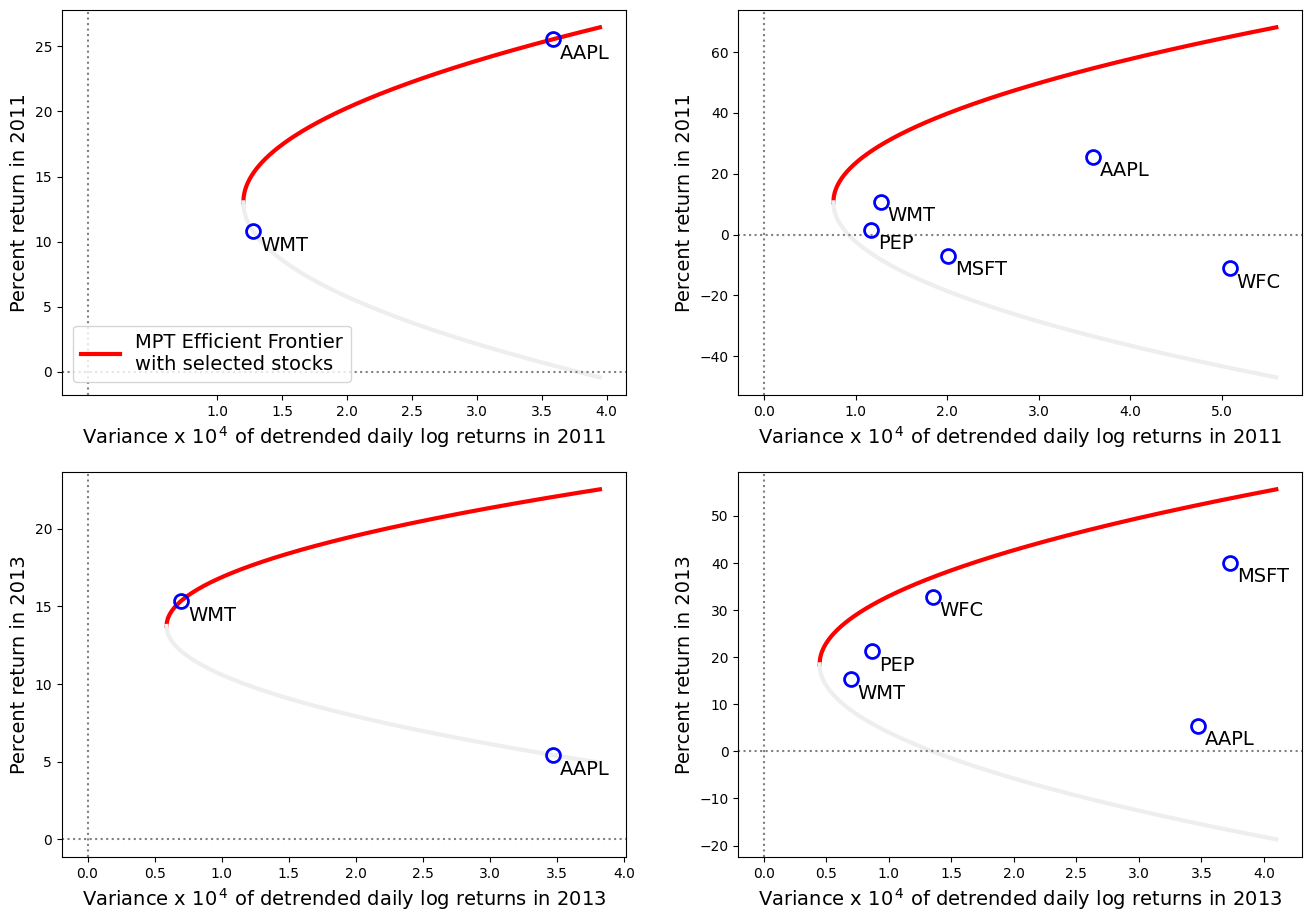

In [8]:
SELECTED_STOCK_LISTS = [['AAPL', 'WMT'], ['AAPL', 'MSFT', 'PEP', 'WFC', 'WMT']]
SELECTED_YEARS = [2011, 2013]

read_calc_plot_eff_front(selected_years=SELECTED_YEARS, selected_stock_lists=SELECTED_STOCK_LISTS)

##### Task: Where are random portfolios on the variance - return plane relative to the Efficient Frontier ?

1. Select $\,N\,$ stocks, and calculate their efficient frontier with the above tools.
2. Generate $\,10^{\,N}\,$ random portfolios of the $\,N\,$ stocks. 
3. For $\,N=2\,$, $\,4\,$ or $\,6\,$ stocks where will these random portfolios lie on the variance - return plot relative to the Efficient Frontier ?

###### Answer

**AAPL** Apple, **F** Ford, **MSFT** Microsoft, **PEP** Pepsi, **T** AT&T, **WFC** Wells-Fargo, **WMT** Walmart

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

STOCK_LISTS = [['AAPL', 'WMT'], ['F', 'MSFT', 'WFC', 'WMT'], ['F', 'MSFT', 'PEP', 'T', 'WFC', 'WMT']]
DATA_FILE_NAME = os.path.join('data', 'prices-split-adjusted.csv.zip')  # data file
SELECTED_YEAR = 2013
N_RND_PER_DIMENSION = 10  # with N selected stocks (N dimensions of the return vector) use 10^N random portfolios
CURVE_STEP_NUM = 1000  # number of steps for plotting the Efficient Frontier numerically
FONTSIZE = 14
VAR_EXP = 4  # plot 10 ^ VAR_EXP * variance
TICKS_FONTSIZE = 12


def random_uniform_list_unit_sum(size=None):
    w = np.random.uniform(size=size)
    return w / np.sum(w)


def eff_front_with_rnd_portfolios_of_stocks():
    """
    Plot the efficient frontier of risky assets (stocks) with historical data.
    Also plot the return vs variance points of random portfolios of these stocks.    
    """
    
    prices = read_prices(file_name=DATA_FILE_NAME, selected_year=SELECTED_YEAR)
    for xtick_ytick in ['xtick', 'ytick']:
        plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)

    n_cols = len(STOCK_LISTS)
    assert n_cols == 3, 'This plot is available only for three stock lists'
    fig, axes = plt.subplots(ncols=n_cols, nrows=1, figsize=(16, 7))
    for i_col, selected_stocks in enumerate(STOCK_LISTS):
        ax = axes[i_col]

        r, c = map(stock_returns_and_covariances(prices=prices, selected_stocks=selected_stocks).get, 
                   ['percent_returns', 'covariances'])
        K, q_0, sigma_0_sqr = map(ef_params(returns=r, covariance_matrix=c).get, ['K', 'q_0', 'sigma_0_sqr'])

        # select randomized portfolios, calculate their percent returns and variances
        n_stock = len(r)
        n_portfolios = int(N_RND_PER_DIMENSION ** n_stock)
        weight_vectors_rnd = [random_uniform_list_unit_sum(size=n_stock) for _ in range(n_portfolios)]
        percent_returns_rnd = [np.matmul(r, w.T) for w in weight_vectors_rnd]
        variances_rnd = np.array([np.matmul(w, np.matmul(c, w.T)) for w in weight_vectors_rnd])

        # points of the parabolic efficient frontier:
        # 'EF_returns' is the upper part, 'EF_returns_lo' is the lower part
        stock_variances = np.diag(c)
        EF_variances = np.linspace(sigma_0_sqr, 1.1 * max(stock_variances), CURVE_STEP_NUM)
        EF_returns = [q_0 + K * np.sqrt(max(0.0, sigma_sqr - sigma_0_sqr)) for sigma_sqr in EF_variances]
        EF_returns_lo = [q_0 - K * np.sqrt(max(0.0, sigma_sqr - sigma_0_sqr)) for sigma_sqr in EF_variances]
        
        # plot curves, labels and the current set of selected stocks
        ax.plot(EF_variances, EF_returns, 'r-', 
                label='MPT Efficient Frontier with\nthe $\,N=' + str(n_stock) + '\,$ selected stocks', lw=3)
        ax.plot(EF_variances, EF_returns_lo, color='#eee', linewidth=3)
        ax.axhline(0, c='gray', ls='dotted', linewidth=1)
        ax.axvline(0, c='gray', ls='dotted', linewidth=1)
        ax.set_xlim(left = -0.1 * max(EF_variances))
        ax.set_title('MPT EF for $\,N = ' + str(n_stock) + '\,$ selected stocks', fontsize=FONTSIZE)
        ax.set_xticks(ax.get_xticks().tolist())  # avoids warning caused by matplotlib bug
        ax.set_xticklabels(['{0:.1f}'.format(x * np.power(10.0, VAR_EXP)) for x in ax.get_xticks()])  # rescaling
        ax.legend(bbox_to_anchor=(.02, .14), loc=2, borderaxespad=0.0, fontsize=FONTSIZE)

        ax.plot(variances_rnd, percent_returns_rnd, 
                label= '$' + str(N_RND_PER_DIMENSION) + '^{\, ' + str(n_stock) + '}$ random portfolios', c='#6f6', 
                marker='^', linewidth=0, markersize=7)
        for x, y, label in zip(stock_variances, r, selected_stocks):
            ax.annotate(label, (x, y), textcoords='offset points', xytext=(0, 6), ha='center', fontsize=FONTSIZE)
        ax.plot(stock_variances, r, c='b', marker='o', linewidth=0, ms=10, fillstyle='none', markeredgewidth=2)

        if i_col == 0:  # display the y axis label only on the left subplot
            ax.set_ylabel('Percent return in ' + str(SELECTED_YEAR), fontsize=FONTSIZE)
        if i_col == 1:  # display horizontal axis label only for the subplot in the center
            ax.set_xlabel('Variance x $10^{\,' + f'{VAR_EXP}' + '}$ of detrended daily log returns ' +
                       'in ' + str(SELECTED_YEAR), fontsize=FONTSIZE)

    plt.show()


eff_front_with_rnd_portfolios_of_stocks()

TypeError: read_prices() got an unexpected keyword argument 'file_name'

#### Two mutual fund theorem

Consider `any two different portfolios` $\,$ A $\,$ and $\,$ B $\,$ that are both `on the efficient frontier` of risky assets.<br/>
Their asset weights are 
$\,\mathbf{w}^\mathrm{\,(A)}=\left(\,w_{\,1}^\mathrm{\,(A)},\,\dots\,,\,w_{\,N}^\mathrm{\,(A)}\,\right)\,$ and
$\,\mathbf{w}^\mathrm{\,(B)}\,$ such that 
$\,\mathbf{w}^\mathrm{\,(A)}\,\mathbf{1}^\mathrm{\,T} = 
\mathbf{w}^\mathrm{\,(B)}\,\mathbf{1}^\mathrm{\,T} = 1\,$.

The two mutual fund theorem states that `any third portfolio` $\,$ C $\,$ that is also on the parabolic efficient frontier of risky assets<br/>
`is a linear combination` of the portfolios $\,$ A $\,$ and $\,$ B $\,$.

The initial portfolios $\,$ A $\,$ and $\,$ B $\,$ are called the `two mutual funds` here.

###### Constructive proof

With the real number $\,z\,$ generate the linear combination 
$\,\mathbf{\hat{w}}=z\,\mathbf{w}^\mathrm{\,(A)}+\left(\,1-z\,\right)\,\mathbf{w}^\mathrm{\,(B)}\,$ of the two initial portfolios.

`All linear combinations are on the parabola`

The vectors $\,\mathbf{w}^\mathrm{\,(A)}\,$ and $\,\mathbf{w}^\mathrm{\,(B)}\,$ 
are both solutions to $\,(1)\,$, $\,(2)\,$, and $\,(3)\,$, 
therefore, $\,\mathbf{\hat{w}}\,$ is also a solution.
<br/>
In other words, the newly constructed portfolio with the $\,\mathbf{\hat{w}}\,$ weights is also on the parabolic efficient frontier of risky assets.
<br/>
As $\,z\,$ moves continuously from $\,-\,\infty\,$ to $\,+\,\infty\,$,
the new portfolio visits all points along the parabola.

`The z value for a selected C portfolio`

Denote by $\,\mathbf{\hat{w}}=\mathbf{w}^\mathrm{\,(C)}\,$ the asset weights of the selected portfolio $\,$ C $\,$, 
and use the above definition of $\,z\,$ to obtain

$
\,\mathbf{w}^\mathrm{\,(C)} - \mathbf{w}^\mathrm{\,(B)} =
z\,\left(\,\mathbf{w}^\mathrm{\,(A)} - \mathbf{w}^\mathrm{\,(B)}\,\right)\,
$.

If this new portfolio $\,$ C $\,$ is identical to the initial portfolio $\,$ A $\,$ (or $\,$ B), then $\,z=1\,$ (or $\,z=0$).

Assuming that the vector $\,\mathbf{w}^\mathrm{\,(A)} - \mathbf{w}^\mathrm{\,(B)}\,$ is not too small
<br/>
(in other words: the initial portfolios $\,$ A $\,$ and $\,$ B $\,$ are sufficiently different),
<br/>
we can multiply this equation from the right with its transposed vector and then divide both sides:

$\,\displaystyle{ z = 
\frac{
\left( \, \mathbf{w}^\mathrm{\,(C)} - \mathbf{w}^\mathrm{\,(B)} \, \right)
\,\cdot\,
\left( \, \mathbf{w}^\mathrm{\,(A)} - \mathbf{w}^\mathrm{\,(B)} \, \right)^\mathrm{T}
}
{
\left( \, \mathbf{w}^\mathrm{\,(A)} - \mathbf{w}^\mathrm{\,(B)} \, \right) 
\,\cdot\,
\left( \, \mathbf{w}^\mathrm{\,(A)} - \mathbf{w}^\mathrm{\,(B)} \, \right)^\mathrm{T}
}
}\,$.

###### Comments

1. With $\,0<z<1\,$ the new portfolio contains a positive amount of both initial portfolios.


2. If $\,z<0\,$, then the entire capital plus $\,-z>0\,$ is allocated to $\,$ B $\,$, and there is a negative (short) position  of $\,$ A $\,$.


3. If $\,z>1\,$, then the entire capital plus $\,z-1\,$ is allocated to $\,$ A $\,$, and there is a short position of $\,$ B $\,$.

### Efficient Frontier with Risk-Free Asset

#### <span style="color:#f00;">The switch from variance to volatility switches from parabola to hyperbola</span>

In the previous section we compared $\,q\,$ (return of the risky portfolio) to $\,\sigma^{\,2}\,$ (variance of the risky portfolio). 
<br/>
`Below this point, we are comparing the return to the volatility,` $\,\sigma\,$.

###### Statement

Changing the independent variable from $\,\sigma^{\,2}\,$ (variance) to $\,\sigma\,$ (volatility)
<br/>
replaces the parabolic $\,q\left(\sigma^{\,2}\right)\,$ curve of $\,(19)\,$
with the hyperbolic $\,q\left(\sigma\right)\,$ curve.

###### Proof

To see that the $\,q\left(\sigma\right)\,$ curve is hyperbolic, please start from $\,(19)\,$ and follow the equivalent transformations below:


$q\left(\,\sigma\,\right)=q_{\,0} + K\,\sqrt{\sigma^\mathrm{\,2}-\sigma^\mathrm{\,2}_{\,0}\,}\,$ $\,\,\,$ with $\,\,\,$ $\sigma^\mathrm{\,2}\ge\sigma^\mathrm{\,2}_{\,0}\,$.

Let's convert this equation to the standard form of the hyperbola. The first step is to subtract $\,q_{\,0}\,$ from both sides:

$
q\left(\sigma\right) - q_{\,0}
=
K\,\sqrt{\sigma^\mathrm{\,2}-\sigma^\mathrm{\,2}_{\,0}\,}\,
\,$.

Square both sides:

$
\left(\,q\left(\sigma\right) - q_{\,0}\,\right)^\mathrm{\,2}
=
K^\mathrm{2}\,\left(\,\sigma^\mathrm{\,2} - \sigma_{\,0}^\mathrm{\,2}\,\right)\,
\,$.

Divide both sides with $\,K^\mathrm{2}\,\sigma^\mathrm{\,2}_{\,0}\,$:

$
\displaystyle{
\frac{\left(\,q - q_{\,0}\,\right)^\mathrm{\,2}}
{K^\mathrm{2}\,\sigma_{\,0}^\mathrm{\,2}}
=
\frac{\sigma^\mathrm{\,2}}
{\sigma_{\,0}^\mathrm{\,2}}
- 1
}
\,$.

Finally, rearrange the equation to the standard form of a `hyperbola`:

$
\displaystyle{
\frac{\sigma^\mathrm{\,2}}
{\sigma_{\,0}^\mathrm{\,2}}
-
\frac{\left(\,q - q_{\,0}\,\right)^\mathrm{\,2}}
{K^\mathrm{2}\,\sigma_{\,0}^\mathrm{\,2}}
=
1
}
\,$.

###### Comments

Recall that in the MPT only the $\,\left(\,\sigma>\sigma_{\,0},\,q>q_{\,0}\,\right)\,$ quadrant of the hyperbola is used.

From the above standard equation form note that the `center of the hyperbola` is at $\,\left(\,\sigma=0,\,q=q_{\,0}\,\right)\,$.

Take the $\,\sigma\to\infty\,$ limit (meaning also $\,q\to\infty$) to see that the `asymptote` of the hyperbola is $\,q=q_{\,0}+K\sigma\,$.

#### Definitions and tools

* The `market portfolio` of risky assets is a portfolio that contains
<br/>each risky asset with a weight proportional to its total market value. 


* The total market value of a stock is also called its `market capitalization` or market cap.


###### Combining the risky assets with the risk-free asset

* The `risk-free asset` has zero volatility and a fixed $\,q_{\,\mathrm{F}}\,$ yearly return.


* Now let us set up a `combined portfolio`:<br/>
<b>invest $\,z\,$ amount of the available capital in the risky assets and $\,1-z\,$ amount in the risk-free asset</b>.


###### Shorting

* Short-selling (also called: shorting) means that you agree to (a) sell an asset now and (b) buy the same asset later,<br/>
because you think its future price will be lower than the price expected by other participants of the market.


* The $\,z<0\,$ range means that we
  - allocate our entire capital in the risk-free asset
  - short-sell $\,-\,z>0\,$ amount of the risky assets
  - purchase the same amount of the risk-free asset.


###### Asset weights, returns and variances

Extend the previously used notations to the `combined (risky + risk-free) portfolio` :

* The weights, returns and the covariance matrix of the risky assets are $\,z\,\mathbf{w}\,$, $\,\mathbf{r}\,$ and $\,\mathbf{c}\,$.
* The sum of the weights of the risky assets is  $\,z\,\mathbf{w}\,\mathbf{1}^\mathrm{\,T} = z\,$.


* The return of the portfolio's risk-free part is $\,\left(\,1-z\,\right)\, q_{\,\mathrm{F}}\,$, 
and the return of the risky part is $\,z\,q=z \, \mathbf{w}\,\mathbf{r}^\mathrm{\,T}$.
* The `return of the entire combined portfolio` is 
$\,\hat{q} = \left(\,1-z\,\right) \, q_{\,\mathrm{F}} +  z \, q = 
q_{\,\mathrm{F}} + z \left(\,q-q_{\,\mathrm{F}}\,\right)\,$.



* The variance of the portfolio's risky part is
$\,\left(\,z\,\mathbf{w}\,\right) \, \mathbf{c}\,\, \left(\,z\,\mathbf{w}\,\right)^\mathrm{\,T}=z^{\,2}\,\sigma^{\,2}\,$. 
* The portfolio's risk-free part has zero variance, and also it has zero covariance with the portfolio's risky part.
* Therefore, the `volatility of the entire combined portfolio` is $\,\hat{\sigma}=\,z\,\sigma\,$.


* Note that investors are willing to take risk only if the risky part's return exceeds the risk-free return: $\,q\gt q_{\,\mathrm{F}}\,$.


* Merge the combined portfolio's return and volatility by eliminating $\,z\,$ from them:

$(20)$ $\,\,\,$
$\,\displaystyle{\hat{q}\,\left(\,\hat{\sigma}\,\right) = 
q_{\,\mathrm{F}} + \frac{\hat{\sigma}}{\sigma}\, \big(\,q-q_{\,\mathrm{F}}\,\big)
}\,$.

#### Description of the task

Calculate the `lowest possible volatility` $\,\hat{\sigma}\,$ of the combined portfolio with the<br/>
`condition` that the return of the combined portfolio is a fixed $\,\hat{q}\ge q_{\,\mathrm{F}}\,$ value.

Equivalently, calculate the highest possible return with a fixed volatility.

#### Solution: Tangent line from the risk-free point to the Efficient Frontier of risky assets

###### The risky assets' $\,q\left(\,\sigma\,\right)\,$ is a convex function

According to $\,(20)\,$, in the $\,\hat{q}\,$ return of the combined portfolio the risky assets appear only through $\,\sigma\,$ and $\,q\,$.
<br/>
Recall that $\,\sigma\,$ and $\,q\,$ are connected by $\,(19)\,$.
Based on $\,(19)\,$ it can be shown that $\,q\left(\,\sigma\,\right)\,$ `is a convex function`,<br/>
because the first derivative is always positive and the second derivative is always negative.

###### Detailed calculation

According to $\,(19)\,$, for the `risky assets`

$q\left(\,\sigma\,\right)=q_{\,0} + K\,\sqrt{\sigma^\mathrm{\,2}-\sigma^\mathrm{\,2}_{\,0}\,}\,$ $\,\,\,$ 
with $\,\,\,$ $\sigma^\mathrm{\,2}\ge\sigma^\mathrm{\,2}_{\,0}\,$,

therefore, 

$(21)\,\,\,
{\displaystyle
q\,\,'\left(\,\sigma\,\right)
=
\frac{K\,\sigma}{\sqrt{\sigma^\mathrm{\,2}-\sigma^\mathrm{\,2}_{\,0}\,}}
= 
K\,\left(\,1-\sigma^\mathrm{\,2}_{\,0}\,\mathit{/}\,\sigma^\mathrm{\,2} \right)^{-1\,\mathit{/}\,2} 
> 
K
>
0
}\,$

and

${\displaystyle
q\,\,'\,'\left(\,\sigma\,\right)
=
-K\,\sigma^\mathrm{\,2}_{\,0} \, \left(\,\sigma^\mathrm{\,2}-\sigma^\mathrm{\,2}_{\,0}\, \right)^{-3\,\mathit{/}\,2}
< 0
}\,$.


###### Summary: Tangent line from the risk-free point to the risky assets' EF

`If` it is possible to draw a tangent line<br/>
from the $\,\left(\,\sigma=0, \, q=q_{\,\mathrm{F}}\,\right)\,$ point of the risk-free asset 
to the efficient frontier (EF) of the risky assets,
<br/>
`then` the efficient frontier of the combined portfolio is a line on the $\,\left(\,\sigma, \, q\,\right)\,$ plane,
<br/>
and this line goes through the risk-free asset point and the tangency point of the risky assets' Efficient Frontier.


###### Comment: Upper boundary of the risk-free return

We saw above that the slope of risky assets' Efficient Frontier has a positive lower boundary:
$\,q\,\,'\left(\,\sigma\,\right) > K > 0\,$.
<br/>
Therefore, the $\,q\left(\,\sigma\,\right)\,$ curve has an upper envelope, the $\,q_{\,0} + K\,\sigma\,$ line.
<br/>
Consequently, the $\,q_{\,\mathrm{F}}\,$ risk-free return value has to be below $\,q_{\,0}\,$.


Recall from equations $\,(14)\,$ and $\,(17)\,$ that 
$\,\,q_{\,0}=
A_{\,12}\,\,\mathit{/}\,A_{\,11}=
\left(\,\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}\,\right)\,\mathit{/}\,
\left(\,\mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}\,\right)\,$.
<br/>
For simplicity, consider the special case of a single risky asset that has a return of $\,r\,$.
<br/>
So in this simplified case the covariance matrix is the variance of that single asset, and $\,q_{\,0}=r\,$.

For more than one risky asset, $\,q_{\,0}\,$ will be a specific weighted average of the asset's returns.
<br/>
So in the general case the $\,q_{\,\mathrm{F}} < q_{\,0}\,$ condition means that the combined portfolio will have a meaningful
<br/>
efficient frontier only if the risk-free rate is below this weighted average of the returns of the risky assets.
<br/>
But this condition should be always fulfilled, because risky assets have to have higher than risk-free returns.
<br/>
Otherwise, investors would not buy these risky assets.

###### Calculating the slope of the return vs volatility line from the condition of being tangent

At the $\,z=1\,$ parameter value of the combined portfolio (risky + risk-free) the entire capital is in the risky assets,
<br/>
therefore, $\,\hat{\sigma}=\sigma\,$ and $\,\hat{q}=q\,$.

If we are on the EF line of the combined portfolio, then the point at $\,z=1\,$ is this line's tangency point with the risky EF.
<br/>
This point is called the `tangency point` and the risky portfolio with this $\,\left(\,\sigma,\,q\,\right)\,$ value pair is called the `tangency portfolio`.


The EF line of the combined portfolio goes through the risk-free asset and the $\,\left(\,\sigma,\,q\,\right)\,$ tangency point (T).
<br/>
At T we have `two conditions` (the two tangent EFs have equal value and slope) and `two unknowns` ($\,\sigma\,$ and $\,q\,$)$\,$.


The Efficient Frontier of the combined (risky + risk-free) portfolio is
<br/>
the line connecting 
the $\,\left(\,0, \, q_{\,\mathrm{F}}\,\right)\,$ risk-free point 
with the $\,\left(\,\sigma, \, q\,\right)\,$ tangency point.

Based on $\,(21)\,$, the equality of the slopes is

$(22)$ $\,\,\,$
$
\displaystyle{\frac{q-q_{\,\mathrm{F}}}{\sigma}} =
\frac{K\,\sigma}{\sqrt{\sigma^\mathrm{\,2}-\sigma^\mathrm{\,2}_{\,0}\,}}\,$

To write down the equality of the values combine $\,(19)\,$ with $\,(22)\,$ and eliminate $\,q\,$ in the following way:

$(23)$ $\,\,\,$
$
\displaystyle{\frac{ q_{\,0}-q_{\,\mathrm{F}} + K\,\sqrt{\sigma^\mathrm{\,2}-\sigma^\mathrm{\,2}_{\,0}\,}}{\sigma}} =
\frac{K\,\sigma}{\sqrt{\sigma^\mathrm{\,2}-\sigma^\mathrm{\,2}_{\,0}\,}}\,$.

With the `new variable` 
$\,s=\sqrt{\sigma^\mathrm{\,2}-\sigma^\mathrm{\,2}_{\,0}\,}\,>\,0\,$
equation $\,(23)\,$ becomes a quadratic equation. 
<br/>
The solution is:

$(24)$ $\,\,\,$
$\displaystyle{s=\frac{K\,\sigma^\mathrm{\,2}_{\,0}}{q_{\,0}-q_{\,\mathrm{F}}}}\,$.
$\,\,\,$ By its definition, $\,s\,$ is positive, therefore, $\,q_{\,\mathrm{F}} < q_{\,0}\,$.

From $\,(24)\,$ and the definition of $\,s\,$, the `tangency portfolio's volatility and return` are<br/>
(the return is calculated by combining $\,(19)\,$ and the calculated volatility)

$(25)$ $\,\,\,$
$\sigma = \sigma_{\,0}\,\sqrt{1+x^{\,2}\,}\,$
$\,\,\,$ $\mathrm{and}$ $\,\,\,$
$q = q_{\,0} + K\,\sigma_{\,0}\,\,x\,$, 
$\,\,\,$  $\mathrm{where}$ $\,\,\,$ 
$\displaystyle{x=\frac{K\,\sigma_{\,0}}{q_{\,0}-q_{\,\mathrm{F}}}\,}$.

##### Graphical explanation of the combined portfolio's efficient frontier

The purpose of the following code is to 

1. display the below graphical explanation of the combined portfolio's Efficient Frontier

2. and to provide utility functions for subsequent calculations.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

FONTSIZE = 14
TICKS_FONTSIZE = 16


def q_diff_to_sigma(q_diff, _K, _sigma_0_sqr):
    """Volatility coordinate of the risky efficient frontier for the selected return difference from q_0."""

    return np.sqrt(((q_diff) / _K) ** 2. + _sigma_0_sqr)


def risky_EF_vol(_q_0, _plot_q_min, _plot_q_max, _K, _sigma_0_sqr, _n_points_of_risky_eff_front):
    """Numerically calculated points of the Efficient Frontier of risky assets with volatilities:
       upper and lower part of the EF."""

    risky_eff_front_return_up = np.linspace(_q_0, _plot_q_max, _n_points_of_risky_eff_front)
    risky_eff_front_volatility_up = [q_diff_to_sigma(q - _q_0, _K, _sigma_0_sqr) for q in risky_eff_front_return_up]
    risky_eff_front_return_lo = np.linspace(_plot_q_min, _q_0, _n_points_of_risky_eff_front)
    risky_eff_front_volatility_lo = [q_diff_to_sigma(_q_0 - q, _K, _sigma_0_sqr) for q in risky_eff_front_return_lo]

    return [[risky_eff_front_volatility_up, risky_eff_front_return_up],
            [risky_eff_front_volatility_lo, risky_eff_front_return_lo]]


def tangency_point_and_combined_EF(_q_0, _q_F, _K, _sigma_0_sqr, _plot_q_max):
    """Tangency point and the combined (risky + risky-free) Efficient Frontier (also called: tangent line)."""
    
    x = _K * np.sqrt(_sigma_0_sqr) / (_q_0 - _q_F)
    tangency_point_volatility = np.sqrt(_sigma_0_sqr) * np.sqrt(1.0 + x ** 2.0)
    tangency_point_return = _q_0 + _K * np.sqrt(_sigma_0_sqr) * x
    tangency_point = (tangency_point_volatility, tangency_point_return)
    
    tangent_line_slope = (tangency_point_return - _q_F) / tangency_point_volatility
    tangent_line_volatility_max = q_diff_to_sigma(_plot_q_max - _q_0, _K, _sigma_0_sqr)
    tangent_line_return_max = _q_F + tangent_line_slope * tangent_line_volatility_max
    tangent_line = [[0.0, tangent_line_volatility_max], [_q_F, tangent_line_return_max]]
    
    return tangency_point, tangent_line


def plot_combined_portfolio_eff_front():
    """Plot an explanation of the combined portfolio's efficient frontier"""

    # parameters used only inside this function
    _q_F, _q_0, _K, _sigma_0_sqr = 0.1, 1.0, 1.0, 1.0
    _n_points_risky_EF = 100
    _plot_q_min, _plot_q_max = -2.0, 4.0
    assert _q_F < _q_0, 'q_F has to be below q_0'

    risky_EF_up, risky_EF_lo = risky_EF_vol(_q_0, _plot_q_min, _plot_q_max, _K, _sigma_0_sqr, _n_points_risky_EF)
    upper_envelope_line = [[0.0, (_plot_q_max - _q_0) / _K], [_q_0, _plot_q_max]]
    tangency_point, tangent_line = tangency_point_and_combined_EF(_q_0, _q_F, _K, _sigma_0_sqr, _plot_q_max)
    assert tangency_point[1] < _plot_q_max, 'Tangency point return is above maximum plotted return'
    
    # plot all
    for xtick_ytick in ['xtick', 'ytick']:
        plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)
    plt.plot(*risky_EF_up, label='Efficient Frontier (EF) of the risky assets', color='r', lw=1, zorder=3)
    plt.plot(*risky_EF_lo, color='#ccc', lw=1, zorder=3)
    plt.plot(*upper_envelope_line, c='#40E0D0', linestyle='--', lw=1, zorder=4, 
             label='Asymptote ($q=q_{\,0}+K\,\sigma$) of the EF of risky assets')  
    plt.plot(*tangent_line, c='b', lw=1, zorder=5, label='EF of the combined (risky + risk-free) portfolios')
    plt.plot([0], [_q_F], c='k', marker='o', lw=0, ms=10, fillstyle='none', mew=2, label='Risk-Free asset', zorder=6)
    plt.plot(*tangency_point, c='k', lw=0, marker='.', mew=3, ms=9, fillstyle='none', label='Tangency point (T)', 
             zorder=6)

    plt.legend(bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.0, fontsize=FONTSIZE)
    plt.title('Illustration of the Efficient Frontier of the combined portfolio\n' +
              'of risky assets and the risk-free asset', fontsize=FONTSIZE)
    plt.xlabel('Volatility of the combined portfolio', fontsize=FONTSIZE)
    plt.ylabel('Return of the combined portfolio', fontsize=FONTSIZE)
    plt.axvline(0, c='gray', ls='dotted', lw=1)
    plt.xticks([0, np.sqrt(_sigma_0_sqr)], [0, '$\sigma_{\,0}$'])
    plt.yticks([_q_F, _q_0], ['$q_{\,\mathrm{F}}$', '$q_{\,0}$'])
    plt.ylim(bottom=-_q_F)
    
    fig = plt.gcf()
    fig.set_size_inches([8, 7])
    plt.show()


plot_combined_portfolio_eff_front()

##### Plot EF, Tangency point, Random portfolios

On the return vs volatility plane where are random portfolios<br/>
compared to the Efficient Frontier of the risky assets and the EF of the combined (risky + risk-free) portfolios ?

1. Select $\,N\,$ stocks, and calculate their efficient frontier with the above tools.
2. Select a risk-free rate below the $\,q_{\,0}\,$ parameter of the risky efficient frontier.
3. Generate random portfolios of the $\,N\,$ stocks and the risk-free asset.
4. See where these random portfolios are relative to the two EFs.

###### Stock tickers

**F** Ford, **NKE** Nike, **PEP** Pepsi, **T** AT&T, **WMT** Walmart

###### Try the following

* Set `z_values` to all 1, or all 0, or all 0.5, or all random numbers between 0 and 1.<br/>

* In each case check where the random portfolios fall on the return vs volatility plots, and explain what you see.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

RISK_FREE_RATE_PERCENT = 8.0
STOCK_LISTS = [['PEP', 'WMT'], ['F', 'NKE', 'PEP', 'T']]
DATA_FILE_NAME = os.path.join('data', 'prices-split-adjusted.csv.zip')  # data file
SELECTED_YEAR = 2013
N_POINTS_RISKY_EF = 300
FONTSIZE = 14
DRAW_PADDING = 1.2  # multiplier for allowing padding at the side of the plotted figure
PLOT_RND_PORTFOLIOS = True
N_RND_PER_DIMENSION = 5  # with N selected stocks (N dimensions of the return vector) use 10 ^ N random portfolios
TICKS_FONTSIZE = 12
VOL_MULT = 100  # instead of the volatility label the horizontal axis with volatility x VOL_MULT


def plot_eff_front_with_rnd_and_risk_free():

    prices = read_prices(file_name=DATA_FILE_NAME, selected_year=SELECTED_YEAR)
    for xtick_ytick in ['xtick', 'ytick']:
        plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)

    n_cols = len(STOCK_LISTS)
    assert n_cols == 2, 'This plot is available only with two subplots.'
    fig, axes = plt.subplots(ncols=n_cols, nrows=1, figsize=(16, 7))
    for i_col, selected_stocks in enumerate(STOCK_LISTS):
        ax = axes[i_col]
        n_stock = len(selected_stocks)

        # returns and covariances of the risky assets
        r, c = map(stock_returns_and_covariances(prices=prices, selected_stocks=selected_stocks).get, 
                   ['percent_returns', 'covariances'])

        # parameters of the efficient frontier of the risky assets
        K, q_0, sigma_0_sqr = map(ef_params(returns=r, covariance_matrix=c).get, ['K', 'q_0', 'sigma_0_sqr'])
        q_F = RISK_FREE_RATE_PERCENT
        assert q_F < q_0, 'Risk-free rate has to be below q_0'

        stock_volatilities = np.sqrt(np.diag(c))
        curves_volatility_max = DRAW_PADDING * max(stock_volatilities)
        plot_q_max = DRAW_PADDING * max(r)
        plot_q_min = 2.0 * q_0 - plot_q_max
        tangency_point, combined_EF = tangency_point_and_combined_EF(q_0, q_F, K, sigma_0_sqr, plot_q_max)
        if tangency_point[1] > plot_q_max:
            plot_q_max = DRAW_PADDING * tangency_point[1]
            plot_q_min = 2.0 * q_0 - plot_q_max
            combined_EF = tangency_point_and_combined_EF(q_0, q_F, K, sigma_0_sqr, plot_q_max)[1]
        risky_EF_up, risky_EF_lo = risky_EF_vol(q_0, plot_q_min, plot_q_max, K, sigma_0_sqr, N_POINTS_RISKY_EF)

        if PLOT_RND_PORTFOLIOS:
            n_portfolios = int(N_RND_PER_DIMENSION ** (n_stock + 1))
            weight_vectors_rnd = [random_uniform_list_unit_sum(size=n_stock) for _ in range(n_portfolios)]
            z_values = np.random.uniform(size=n_portfolios) 
            # z_values = 0.2 * np.ones(n_portfolios)  # z values all 0.2
            # z_values = np.zeros(n_portfolios)  # z values all zero

            percent_returns_of_rnd_portfolios = [(1 - z) * q_F + z * np.matmul(r, w.T) 
                                                 for w, z in zip(weight_vectors_rnd, z_values)]
            variances_of_rnd_portfolios = [z ** 2.0 * np.matmul(w, np.matmul(c, w.T)) 
                                           for w, z in zip(weight_vectors_rnd, z_values)]

            ax.plot(np.sqrt(variances_of_rnd_portfolios), percent_returns_of_rnd_portfolios, 
                    label= '$' + str(N_RND_PER_DIMENSION) + r'^{\,N + 1}$ random portfolios', 
                    c='#6f6', marker='^', linewidth=0, markersize=7, zorder=1)

        # curves, titles and  the current set of selected stocks
        ax.plot(*risky_EF_up, color='r', linewidth=2, zorder=3, label='MPT Efficient Frontier (EF) of risky assets')
        ax.plot(*risky_EF_lo, color='#aaa', linewidth=2, zorder=3)
        ax.plot(*combined_EF, label='MPT EF of combined (risky + risk-free) portfolios', color='b', lw=2, zorder=4)
        ax.set_xticks(ax.get_xticks().tolist())  # avoids warning caused by matplotlib bug
        ax.set_xticklabels(['{0:.1f}'.format(x * VOL_MULT) for x in ax.get_xticks()])
        ax.axhline(0, c='gray', ls='dotted', linewidth=1)
        ax.axvline(0, c='gray', ls='dotted', linewidth=1)
        ax.set_xlim(left = -0.1 * max(risky_EF_up[0]))
        ax.set_title('MPT EF with risk-free asset and $\,N = ' + str(n_stock) + '\,$ selected stocks', 
                     fontsize=FONTSIZE)        
        if 1 == i_col:  # plot legend only on the right subfigure
            ax.legend(bbox_to_anchor=(.02, .22), loc=2, borderaxespad=0.0, fontsize=FONTSIZE)

        # plot labels, axis labels and selected stocks with labels
        ax.set_ylabel('Percent return in ' + str(SELECTED_YEAR), fontsize=FONTSIZE)
        ax.set_xlabel('Volatility x $' + '{}'.format(VOL_MULT) + '}$ of detrended daily log returns ' +
                      'in ' + str(SELECTED_YEAR), fontsize=FONTSIZE)
        ax.plot(stock_volatilities, r, c='k', marker='o', linewidth=0, ms=10, fillstyle='none', markeredgewidth=2)
        for x, y, label in zip(stock_volatilities, r, selected_stocks):
            ax.annotate(label, (x, y), textcoords='offset points', xytext=(8, -8), ha='left', fontsize=FONTSIZE)
        ax.plot([0], [q_F], c='k', marker='o', linewidth=0, markersize=10, fillstyle='none', markeredgewidth=2)
        ax.annotate('Risk-Free\nasset', (0, q_F), textcoords='offset points', 
                    xytext=(0, -9), ha='center', va='top', fontsize=FONTSIZE)
        ax.plot(*tangency_point, c='k', lw=0, marker='.', mew=3, ms=10, fillstyle='none')
        ax.annotate('Tangency\nportfolio', tangency_point, textcoords='offset points', 
                    xytext=(-5, 2), ha='right', va='bottom', fontsize=FONTSIZE)

    plt.show()    

        
plot_eff_front_with_rnd_and_risk_free()

##### One mutual fund theorem

Consider `any portfolio` $\,$ P $\,$ on the Efficient Frontier line of the combined (risky + risk-free) portfolio.
<br/>
The one mutual fund theorem states that this portfolio `is a linear combination` of the risk-free asset and the tangency portfolio.
<br/>
The tangency portfolio $\,$ T $\,$ is called the `one mutual fund` here.

###### Constructive proof

In the tangency portfolio the weight of the risk-free asset is $\,0\,$, and the weights of the risky assets are $\,\mathbf{w}\,$.
<br/>
For a selected $\,z\ge 0\,$, generate the portfolio containing the risky assets with weights
$\,z\,\mathbf{w}\,$, and the risk-free asset with weight $\,1-z\,$.
<br/>
When $\,z\,$ moves continuously, this new portfolio visits all points along the efficient frontier line.

To obtain the $\,z\,$ value reproducing a selected portfolio $\,$ P $\,$ on the EF line do the following:
1. If the selected $\,$ P $\,$ portfolio contains the risk-free asset with weight $\,1\,$, then $\,z=0\,$.
2. Otherwise $\,z\,$ is the sum of the weights of the risky assets in portfolio $\,$ P $\,$.

##### Capital Allocation Line (CAL) and Capital Market Line (CML)

###### Combine a fixed risky portfolio with the risk-free asset
Consider a fixed $\,$ F $\,$ `portfolio of the risky assets` with asset weights $\,\mathbf{w}^\mathrm{\,(F)}\,$
<br/>
such that the sum of these asset weights is $\,\mathbf{w}^\mathrm{\,(F)}\,\mathbf{1}^\mathrm{\,T}=1\,$.

With a selected $\,z\ge 0\,$ construct another portfolio that contains $\,z\,$ amount of $\,$ F $\,$ and $\,1-z\,$ amount of the risk-free asset.
<br/>
The return and the volatility of this combined portfolio are both linear functions of $\,z\,$.
<br/>
Therefore, the return of this combined portfolio is a linear function of its volatility.
<br/>
In summary, the portfolios combining the risk-free asset with a fixed risky portfolio are a `line on the return vs volatility plot`.

The `Capital Allocation Line` (CAL) is the set of return (vertical axis) vs volatility (horizontal axis)
points of all portfolios<br/>
that combine a `fixed risky portfolio` with the `risk-free asset`.

###### Combine the tangency portfolio with the risk-free asset

The `Capital Market Line` (CML) is the CAL with the highest possible slope connecting the risk-free asset with a risky portfolio.<br/>
In other words, the CML is that particular CAL for which the fixed risky portfolio is the tangency portfolio.

###### The MPT implies that the Market portfolio has the same risky asset relative weights as the tangency portfolio

If all participants of the market optimize their portfolios with the MPT, then everyone holds a portfolio that lies on the Capital Market Line. However, all portfolios along the CML are linear combinations of the risk-free asset and the tangency portfolio. Therefore, every investor's portfolio contains the risky assets of the market with the risky asset weights of the tangency portfolio. The sum of all investors' risky asset holdings is the total market capitalization of the risky assets. Thus, the market portfolio contains risky assets with the same relative weights as the tangency portfolio.

In summary, the tangency portfolio and the (normalized) market portfolio are the same portfolio.

###### The CML is the EF of the combined portfolio

Based on the above, the Efficient Frontier of the combined (risk-free + risky assets) portfolio and the CML are the same line. 

#### Performance measurement

##### Sharpe ratio of a selected portfolio (1966)

On the return vs volatility plane connect a selected $\,$ P $\,$ portfolio with the risk-free asset.
<br/>
The slope of this line is the Sharpe ratio of the selected portfolio. 
<br/>
It was introduced as the `reward-to-variability ratio` by W. F. Sharpe [in this paper](https://www.jstor.org/stable/2351741).


Denote by $\,q_F\,$ the risk-free rate, and denote by $\,q_P\,$ and $\,\sigma_P\,$ the `observed return and volatility`
of the selected portfolio.
<br/>
The `ex-post Sharpe ratio` of the selected portfolio is

$(26)$ $\,\,\,$
$\displaystyle{S_P=\frac{q_P-q_F}{\sigma_P}}\,$.

Here `ex-post` means "after the fact", and it refers to events that already happened.
<br/>
The definition of the `ex-ante` Sharpe ratio contains the future expected values of $\,q_P\,$, $\,q_F\,$, and $\,\sigma_P\,$.

###### Advantages and Limitations
* one simple number for comparing portfolios
* only the first two moments are considered, therefore, extreme events are handled incorrectly

###### Sortino ratio

The `volatility of a time series below a fixed level` is the volatility of those values that are below the selected fixed level.

To obtain the `Sortino ratio`, start from $\,(26)\,$, and `replace`
<br/>
$\bullet\,$ the risk-free rate with the $\,q_{\,E}\,$ return that we are expecting from the portfolio,
<br/>
$\bullet\,$ the portfolio's observed $\,\sigma_P\,$ volatility with the portfolio's 
observed $\,\sigma_{P,E}\,$ volatility below the expected return.

With these notations the ex-post Sortino ratio is

$(27)$ $\,\,\,$
$\displaystyle{S=\frac{q_P-q_{\,E}}{\sigma_{P,E}}}\,$.

##### Task: Which portfolio of risky assets has the highest Sharpe ratio ?

###### Answer

The tangency portfolio.


On the return vs volatility plane connect the risk-free portfolio with any selected portfolio of risky assets.
<br/>
This line will have the highest slope if the selected risky portfolio is the tangency portfolio.


For a graphical explanation please scroll back up to the return vs volatility plots.

##### Task: For single stocks what is the relationship between the Sharpe ratio and the Sortino ratio ?

* Investigate the two figures below that compare the Sharpe ratio with the Sortino ratio
* How are these two figures related to the `shape of the distribution` of the detrended daily log returns ?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

RISK_FREE_RATE_PERCENT = 12.0
SELECTED_STOCKS = ['AAPL', 'F', 'MSFT', 'PEP', 'T', 'WFC', 'WMT']
SELECTED_YEAR = 2013
FILE_NAME = os.path.join('data', 'prices-split-adjusted.csv.zip')  # data file
PERCENT_TARGET_RETURNS = [0.0, 12.0]  # example target returns for calculating the Sortino ratio
FONTSIZE = 14
TICKS_FONTSIZE = 14


def percent_returns_vols_down_vols(prices=None, selected_stocks=None, percent_fixed_level=None):
    """For the selected stocks:
       - Percent returns
       - Percent volatilities of the detrended daily log returns.
       - Percent volatilities of the detrended daily log returns below the requested fixed level."""

    # percent returns
    p = prices[selected_stocks].copy()
    p.dropna(axis='columns', inplace=True)
    percent_returns = np.array([100.0 * (p[symbol][-1] / p[symbol][0] - 1.0) for symbol in p.columns])

    # for daily log returns: volatilities and volatilities of the values below the fixed requested level
    daily_log_return_fixed_level = np.log(1.0 + percent_fixed_level / 100.0) / np.log(p.shape[0])
    percent_down_vols = list()
    pt = p.copy()  # pt: prices transformed to daily log returns
    for name in pt.columns:
        pt[name] = np.log(pt[name]) - np.log(pt[name]).shift()
        values_below_level = pd.Series(data=[r for r in pt[name] 
                                             if r < daily_log_return_fixed_level], dtype='float64')
        percent_down_vols.append(values_below_level.std() * 100.0)
    pt.dropna(axis='rows', inplace=True)
    percent_volatilities = pt.std().to_numpy() * 100.0
            
    return percent_returns, percent_volatilities, percent_down_vols


def plot_sharpe_and_sortino_of_selected_stocks():
    """Plot Sharpe ratios and Sortino ratios of selected stocks for the selected year"""    
    plt.clf()
    prices = read_prices(file_name=DATA_FILE_NAME, selected_year=SELECTED_YEAR)
    for i_col, percent_target_return in enumerate(PERCENT_TARGET_RETURNS):

        # calculate returns, sharpe ratios and sortino ratios for the selected stocks
        percent_returns, percent_vols, percent_down_vols = percent_returns_vols_down_vols(prices=prices, 
            selected_stocks=SELECTED_STOCKS, percent_fixed_level=percent_target_return)
        sharpe_ratios = (percent_returns - RISK_FREE_RATE_PERCENT) / percent_vols
        sortino_ratios = (percent_returns - percent_target_return) / percent_down_vols
        
        # plot data and labels
        plt.subplot(100 * 1 + 10 * len(PERCENT_TARGET_RETURNS) + (i_col + 1))
        plt.plot(sharpe_ratios, sortino_ratios, c='r', marker='x', lw=0, ms=7, fillstyle='none', mew=2)
        plt.xlabel('Sharpe ratio', fontsize=FONTSIZE)
        plt.ylabel('Sortino ratio with Expected return = ${}\,\%$'.format(percent_target_return), fontsize=FONTSIZE)
        plt.title('Sortino ratio vs Sharpe ratio\n' +
                  'Risk-free return = ${}\,\%$. Expected return = ${}\,\%$'
                  .format(RISK_FREE_RATE_PERCENT, percent_target_return), fontsize=FONTSIZE)
        plt.axhline(0, c='gray', ls='dotted', linewidth=1)
        plt.axvline(0, c='gray', ls='dotted', linewidth=1)
        min_sharpe_ratio = min(sharpe_ratios)
        plt.xlim(left = min([0.7 * min_sharpe_ratio, 1.3 * min_sharpe_ratio]))
        for x, y, label in zip(sharpe_ratios, sortino_ratios, SELECTED_STOCKS):
            plt.annotate(label, (x, y), textcoords='offset points', xytext=(-7, 2), 
                         ha='right', va='center', fontsize=FONTSIZE)
        for xtick_ytick in ['xtick', 'ytick']:
            plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)

    fig = plt.gcf()
    fig.set_size_inches([15, 6])
    plt.show()


plot_sharpe_and_sortino_of_selected_stocks()

## Capital Asset Pricing Model (CAPM)

Developed in the 1960s by Jack Treynor and others based on the MPT.

###### What does the MPT do ?

`Modern Portfolio Theory` (MPL) uses the Efficient Market Hypothesis (EMH) to calculate 
<br/>&nbsp;&nbsp;&nbsp;&nbsp;(i) the efficient frontier of portfolios containing only risky assets
<br/>&nbsp;&nbsp;&nbsp;&nbsp;(ii) and the Capital Market Line (CML), which is the efficient frontier of the combined (risk-free + risky) portfolios.


The Efficient Frontier of risky assets and the CML are tangent at the `tangency point`.
<br/>
The coordinates of the Tangency point are the volatility and return of the tangency portfolio.
<br/>
The tangency portfolio has no risk-free asset. It has relative risky asset weights equal to those of the market portfolio.


The Capital Market Line compares return with the `full risk`,
<br/>which is quantified as the volatility.

###### What does the CAPM do ?

Based on the EMH and the CML, the `Capital Asset Pricing Model` compares<br/>a risky portfolio's return with the amount of its `non-diversifiable risk` (also called: systematic risk),<br/>
which is quantified as $\,\beta\,$.

### <span style="color:#f00;">Security Market Line (SML): switch from volatility to beta</span>

#### Definitions and tools

* The $\,\beta\,$ of an asset is its covariance with the market portfolio divided by the variance of the market portfolio.<br/>


* In practice, $\,\beta\,$ is calculated from the daily closing values of the past 1 - 3 years.
<br/>
Note: (a) this is only one realization of the distribution of possible past $\,\beta\,$ values, (b) future distributions may be different.


* Mathemetically equivalent alternative definition:<br/>$\beta\,$ is the slope when fitting a line to the asset value vs market value scatter plot.

###### Notes
* The covariance measures a **linear** relationship of the symmetric components of two distributions
<br/>
plus the linear relationship of their antisymmetric components.
* The symmetric component of one distribution is not compared to the antisymmetric component of the other.
* The covariance has not been designed to quantify non-linear relationships.

#### Calculation of the Security Market Line (SML)

Select a `single risky asset` or a `portfolio of risky assets`, R, with return $\,q_R\,$ and volatility $\,\sigma_R\,$.
<br/>
Denote by $\,q_M\,$ and $\,\sigma_M\,$ the return and volatility of the market portfolio (also called: tangency portfolio), M.
<br/>
The correlation of R with the market portfolio is $\,\rho_{RM}\,$.
<br/>
The return of the risk-free asset is $\,q_F\,$.

Take a $\,0<|x|\ll 1\,$ number, and allocate $\,x\,$ part of the available capital in R, and $\,1-x\,$ part in M.
<br/>The return and the volatility of this portfolio are

$(28)$ $\,\,\,$
$\,q = x\,q_R + (\,1-x\,)\,q_M\,$
$\,\,\,$ and $\,\,\,$ 
$\,\sigma=\sqrt{
x^{\,2}\,\sigma_R^{\,2} + 
2\,x\,\left(\,1-x\,\right)\,\rho_{RM}\,\sigma_R\,\sigma_M +
\left(\,1-x\,\right)^{\,2}\,\sigma_M^{\,2}
\,}\,$.

<br/>
For any value of $\,x\,$ the portfolio combining R with M contains only risky assets,
<br/>
therefore, the $\,q\,\left(\,\sigma\,\right)\,$ curve shown in $\,(28)\,$ cannot be above the efficient frontier (EF) of risky assets.
<br/>
Moreover, the $\,x=0\,$ point of this $\,q\,\left(\,\sigma\,\right)\,$ curve is M, which is the tangency point of the CML and the risky EF.

All involved curves are smooth, therefore, `at the tangency point` (at $\,x=0\,$) the $\,q\,\left(\,\sigma\,\right)\,$ curve of $\,(28)\,$ is 
<br/>
`tangent` from below to both the risky EF and the CML, and its slope equals the `slope of the CML`.
<br/>
This last result (the equality of the slopes) can be used to connect $\,q_R\,$ with $\,\sigma_R\,$.


The slope of the $\,q\,\left(\,\sigma\,\right)\,$ curve of $\,(28)\,$ at $\,x=0\,$ is the following:

$\displaystyle{
\frac{d\,q}{d\,\sigma}\Bigg|_{\,x\,=\,0} =
\frac{\partial\,q\,\mathit{/}\,\partial\,x}{\partial\,\sigma\,\mathit{/}\,\partial\,x}\Bigg|_{\,x\,=\,0} =
\frac{q_R-q_M}{\rho_{RM}\,\sigma_R-\sigma_M}
}\,$.

Setting this equal to the $\,\left(\,q_M-q_F\,\right)\,\mathit{/}\,\sigma_M\,$ slope of the CML gives the
`Security Market Line (SML)`:

$(29)$ $\,\,\,$
$\,q_R = q_F + \beta_R\,\left(\,q_M-q_F\,\right)$
$\,\,\,$
where
$\,\,\,$
$\displaystyle{\beta_R=\frac{\rho_{RM}\,\sigma_R}{\sigma_M}}\,$.

For the `special case` of R $=$ M note from $\,(29)\,$ that the $\,\beta\,$ of the market portfolio is $\,\beta_M=1\,$.

###### Equivalent definitions of $\,\beta_R\,$

* $\,\displaystyle{\beta_R=\frac{\rho_{RM}\,\sigma_R}{\sigma_M} = \frac{\mathrm{Covariance} \left(\,R\,,\,M\,\right)}{\mathrm{Variance} \left(\,M\,\right)}  }\,$.



* $\,\beta_R\,$ is the slope of the linear fit to the scatter plot displaying R values (vertical coordinate) vs M values (horizontal) in time.

##### Two detailed calculations

For the above derivation of the SML, please see the following two detailed calculations:

`1:` Derivation of $\,\partial\,\sigma\,\mathit{/}\,\partial\,x\,$ at $\,x=0\,$

Based on $\,(28)\,$:

$\displaystyle{
\frac{\partial\,\sigma}{\partial\,x}
=
\frac{\partial}{\partial\,x}
\sqrt{
x^{\,2}\,\sigma_R^{\,2} + 
2\,x\,\left(\,1-x\,\right)\,\rho_{RM}\,\sigma_R\,\sigma_M +
\left(\,1-x\,\right)^{\,2}\,\sigma_M^{\,2}
\,}
}\,$.

Differentiate the square root function:

$\displaystyle{
\frac{\partial\,\sigma}{\partial\,x}
=
\frac{1}{2\,\sigma}
\,
\frac{\partial}{\partial\,x}
\Big(\,
x^{\,2}\,\sigma_R^{\,2} + 
2\,x\,\left(\,1-x\,\right)\,\rho_{RM}\,\sigma_R\,\sigma_M +
\left(\,1-x\,\right)^{\,2}\,\sigma_M^{\,2}
\,\Big)
}\,
$.

Expand the terms that contain $\,x\,$:

$\displaystyle{
\frac{\partial\,\sigma}{\partial\,x}
=
\frac{1}{2\,\sigma}
\,
\frac{\partial}{\partial\,x}
\Big(\,
x^{\,2}\,\sigma_R^{\,2} + 
2\,x\,\rho_{RM}\,\sigma_R\,\sigma_M -
2\,x^2\,\rho_{RM}\,\sigma_R\,\sigma_M +
\sigma_M^{\,2}-
2\,x\,\sigma_M^{\,2}+
x^2\,\sigma_M^{\,2}
\,\Big)
}\,
$.

Differentiate with respect to $\,x\,$ to obtain

$\displaystyle{
\frac{\partial\,\sigma}{\partial\,x}
=
\frac{1}{2\,\sigma}
\,
\left(\,
2\,x\,\sigma_R^{\,2} + 
2\,\rho_{RM}\,\sigma_R\,\sigma_M -
4\,x\,\rho_{RM}\,\sigma_R\,\sigma_M -
2\,\sigma_M^{\,2}+
2\,x\,\sigma_M^{\,2}
\,\right)
}\,
$.

Apply the $\,x=0\,$ condition:

$\displaystyle{
\frac{\partial\,\sigma}{\partial\,x}\Bigg|_{\,x\,=\,0}
=
\frac{1}{2\,\sigma}
\,
\left(\,
2\,\rho_{RM}\,\sigma_R\,\sigma_M -
2\,\sigma_M^{\,2}
\,\right)
}\,
$.

Finally, note that at the $\,x=0\,$ point $\,\sigma=\sigma_M\,$:

$\displaystyle{
\frac{\partial\,\sigma}{\partial\,x}\Bigg|_{\,x\,=\,0}
= \frac{2\,\rho_{RM}\,\sigma_R\,\sigma_M - 2\,\sigma_M^{\,2}}{2\,\sigma_M}
}\,
$.

This gives

$\displaystyle{\frac{\partial\,\sigma}{\partial\,x}\Bigg|_{\,x\,=\,0} = \rho_{RM}\,\sigma_R - \sigma_M}\,$.


`2:` Derivation of the SML from the equality of the slopes

The slope of the $\,q\,\left(\,\sigma\,\right)\,$ curve of $\,(28)\,$ at $\,x=0\,$ is the following:

$\displaystyle{
\frac{d\,q}{d\,\sigma}\Bigg|_{\,x\,=\,0} =
\frac{q_R-q_M}{\rho_{RM}\,\sigma_R-\sigma_M}
}\,$.

Setting this slope equal to the $\,\left(\,q_M-q_F\,\right)\,\mathit{/}\,\sigma_M\,$ slope of the CML gives

$\displaystyle{
\frac{q_R-q_M}{\rho_{RM}\,\sigma_R-\sigma_M}
=
\frac{q_M-q_F}{\sigma_M}
}\,$.

Multiply with the denominator of the l.h.s.:

$\displaystyle{
q_R-q_M
=
\frac{\left(\,\rho_{RM}\,\sigma_R-\sigma_M\,\right)\,\left(\,q_M-q_F\,\right)}{\sigma_M}
}\,$.

Rearrange the r.h.s.:

$\displaystyle{
q_R-q_M
=
\frac{\rho_{RM}\,\sigma_R}{\sigma_M}\,\left(\,q_M-q_F\,\right) 
-
\frac{\sigma_M}{\sigma_M}\left(\,q_M-q_F\,\right)
}\,$.

Add $\,q_M\,$ to both sides and move $\,q_F\,$ to the front of the r.h.s. to get the Security Market Line:

$\displaystyle{
q_R
=
q_F + \frac{\rho_{RM}\,\sigma_R}{\sigma_M}\,\left(\,q_M-q_F\,\right) 
}\,$.


#### Graphical explanation of combining a fixed Risky asset with the Market portfolio

The purpose of the following code is to generate the graphical explanation.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

FONTSIZE = 14
TICKS_FONTSIZE = 16
N_POINTS = 101
RM_PADDING = 1.2  # extend curve of combined portfolios by this factor


def plot_Risky_and_Market():
    """Plot a graphical explanation of combining a Risky portfolio with the Market portfolio."""

    # parameters used only inside this function
    _q_F, _q_0, _K, _sigma_0_sqr = 0.05, 1.0, 1.0, 1.0
    _n_points_risky_EF = 100
    _plot_q_min, _plot_q_max = -1.0, 3.0
    assert _q_F < _q_0, 'q_F has to be below q_0'
        
    risky_EF_up, risky_EF_lo = risky_EF_vol(_q_0, _plot_q_min, _plot_q_max, _K, _sigma_0_sqr, _n_points_risky_EF)
    tangency_point, tangent_line = tangency_point_and_combined_EF(_q_0, _q_F, _K, _sigma_0_sqr, _plot_q_max)
    assert tangency_point[1] < _plot_q_max, 'Tangency point return is above maximum plotted return'

    # the investigated risky asset: the multipliers (sigma_mult and q_mult) are selected for good visibility
    _sigma_mult, _q_mult = 1.35, 1.2
    _sigma_R = _sigma_mult * tangency_point[0]
    _q_R = _q_mult * tangency_point[1]
    _rho_RM = (_q_R - _q_F) / (tangency_point[1] - _q_F) * tangency_point[0] / _sigma_R
    assert _q_R >= _q_0, 'q_R has to be at least q_0'
    assert _sigma_R >= np.sqrt(_sigma_0_sqr + ((_q_R - _q_0) / _K) ** 2.0), 'sigma_R has to be inside the risky EF'
    x_values = np.linspace(-RM_PADDING, RM_PADDING, N_POINTS)
    sigma_values = [np.sqrt(x ** 2.0 * _sigma_R ** 2.0 + 2.0 * x * (1.0 - x) * _rho_RM * _sigma_R * tangency_point[0] +
                            (1.0 - x) ** 2.0 * tangency_point[0] ** 2.0) for x in x_values]
    q_values = [x * _q_R + (1.0 - x) * tangency_point[1] for x in x_values]
    
    # plot all
    for xtick_ytick in ['xtick', 'ytick']:
        plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)
    plt.plot(*risky_EF_up, label='Efficient Frontier (EF)\nof the risky assets', color='r', lw=1, zorder=3)
    plt.plot(*risky_EF_lo, color='#aaa', lw=1, zorder=3)
    plt.plot(*tangent_line, c='b', lw=1, zorder=5, 
             label='Capital Market Line (CML):\nEF of the risky + risk-free portfolios')
    text_x = 0.05 * tangency_point[0]
    text_y = 0.3 * _q_F + 0.7 * tangency_point[1]
    plt.text(text_x, text_y, 'Capital Market Line:\ncompares return\nwith full risk ($\,\sigma\,$)',
        horizontalalignment='left', verticalalignment='center', fontsize=FONTSIZE, color='blue')
    
    plt.plot([0], [_q_F], c='k', marker='o', lw=0, ms=10, fillstyle='none', mew=2, label='Risk-Free asset', zorder=6)
    plt.plot(*tangency_point, c='k', lw=0, marker='.', mew=3, ms=10, fillstyle='none', 
             label='Tangency point = Market portfolio (M)', zorder=6)
    plt.plot([_sigma_R], [_q_R], c='#0d0', lw=0, marker='.', mew=2, ms=18, 
             label='A fixed portfolio of risky assets (R)', zorder=6)
    plt.plot(sigma_values, q_values, c='#0d0', lw=1, zorder=6, label='Portfolios combining R with M')

    plt.legend(bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.0, fontsize=FONTSIZE)
    plt.title('Graphical explanation of combining a\n' +
              'fixed portfolio of risky assets (R) with the Market portfolio (M)', fontsize=FONTSIZE)
    plt.xlabel('Portfolio Volatility', fontsize=FONTSIZE)
    plt.ylabel('Portfolio Return', fontsize=FONTSIZE)
    plt.axvline(0, c='gray', ls='dotted', lw=1)
    xticks = {0: '0', np.sqrt(_sigma_0_sqr): '$\sigma_{\,0}$', tangency_point[0]: '$\sigma_{\,\mathrm{M}}$',
              _sigma_R: '$\sigma_{\,\mathrm{R}}$'}
    yticks = {_q_F: '$q_{\,\mathrm{F}}$', _q_0: '$q_{\,0}$', tangency_point[1]: '$q_{\,\mathrm{M}}$',
              _q_R: '$q_{\,\mathrm{R}}$'}    
    plt.xticks(sorted(xticks), [xticks[x] for x in sorted(xticks)])
    plt.yticks(sorted(yticks), [yticks[y] for y in sorted(yticks)])

    fig = plt.gcf()
    fig.set_size_inches([8, 7])
    plt.show()    
    
    
plot_Risky_and_Market()

#### Task: Compare soft drink stocks to their weighted average (an artificial market portfolio)

Assume that the entire market is made up of the following stocks:
**KO** (Coca Cola), **MNST** (Monster Beverage), **PEP** (Pepsi).
<br/>
Their 2020 market caps were approximately $\,210\,$, $\,30\,$, and $\,160\,\times\,10^{\,9}\,$ USD, 
so their weights for 2020 are $\,\left(\,0.525,\,0.075,\,0.4\,\right)\,$.

From the daily log returns calculate the $\,\beta\,$ of all three stocks for a selected year.
<br/>
Next, plot each stock's daily log return against the daily log return of the (weighted average) market portfolio.

Please explain the meaning the obtained different $\,\beta\,$ values for the analysed soft drink stocks.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from collections import OrderedDict
import os

SELECTED_YEAR = 2011
FILE_NAME = os.path.join('data', 'prices-split-adjusted.csv.zip')
SELECTED_STOCKS_WEIGHTS = OrderedDict({'KO': 0.525, 'MNST': 0.075, 'PEP': 0.4})
FONTSIZE = 14
TICKS_FONTSIZE = 7


def read_prices_select_stocks_year(file_name=None, selected_year=None, selected_stocks=None):
    """Read prices for the selected year and the selected stocks."""

    p = pd.read_csv(file_name)[['date', 'symbol', 'close']]  # p: prices
    p.date = pd.to_datetime(p.date)
    p['year'] = [_.year for _ in p.date]    
    p_grouped = p.groupby(p.year)
    last_day_prev_yr = p_grouped.get_group(selected_year-1).date.max() if selected_year-1 in p_grouped.groups else None
    last_day_sel_yr = p_grouped.get_group(selected_year).date.max() if selected_year in p_grouped.groups else None
    assert last_day_prev_yr is not None and last_day_sel_yr is not None, 'Please select a different year'

    p = p[(last_day_prev_yr <= p.date) & (p.date <= last_day_sel_yr)]
    p = p.pivot(index='date', columns='symbol', values='close')
    p = p[selected_stocks]
    
    return p


def selected_stocks_yearly_percent_returns_and_beta(stocks_and_weights=None, selected_year=None):
    """Read the prices of selected stocks for the selected year. Convert prices to daily log returns.        
       With the requested weighted sum of the stocks as a market portfolio calculate each stock's beta.
       Calculate also the yearly percent return of each stock."""

    # read and transform data
    prices = read_prices_select_stocks_year(file_name=FILE_NAME, selected_year=selected_year, 
                                            selected_stocks=stocks_and_weights.keys())
    yearly_percent_return = dict()
    for name in prices.columns:
        yearly_percent_return[name] = (prices[name][-1] / prices[name][0] - 1.0) * 100.0
        prices[name] = np.log(prices[name]) - np.log(prices[name]).shift()
    prices.dropna(axis='rows', inplace=True)

    # weight average of the selected stocks
    first_column = prices[list(stocks_and_weights.keys())[0]]
    m = pd.Series(index=first_column.index, data=np.zeros(first_column.size))  # market portfolio
    for ticker, weight in stocks_and_weights.items():
        m = m.add(prices[ticker].multiply(weight))
    prices['Market'] = m.values

    # linear regression: beta is the slope
    result = pd.DataFrame({'weight': stocks_and_weights})
    intercept = OrderedDict()
    slope = OrderedDict()
    rsqr = OrderedDict()
    X = prices['Market'].values.reshape(-1, 1)  # column vector: appropriate number of rows (see "-1") with 1 column 
    for ticker in stocks_and_weights:
        y = prices[ticker].values.reshape(-1, 1)
        linear_regressor = LinearRegression().fit(X, y)
        slope[ticker] = round(linear_regressor.coef_[0][0], 3)
        intercept[ticker] = round(linear_regressor.intercept_[0], 6)
        rsqr[ticker] = round(linear_regressor.score(X, y), 3)
    result['intercept'] = pd.Series(intercept)
    result['slope'] = pd.Series(slope)
    result['R_sqr'] = pd.Series(rsqr)

    return prices, result, yearly_percent_return


def plot_selected_stock_prices_beta(prices=None, result=None):
    """Plot the prices and beta of the selected stocks and the constructed weighted sum portfolio (as market)."""
    
    prices, result, yearly_percent_return = selected_stocks_yearly_percent_returns_and_beta(
        stocks_and_weights=SELECTED_STOCKS_WEIGHTS, selected_year=SELECTED_YEAR)

    n_stocks = len(result.index)
    assert n_stocks == 3, 'This plot is implemented only for three stocks'
    fig, axes = plt.subplots(ncols=n_stocks, nrows=1, figsize=(16, 5))
    for xtick_ytick in ['xtick', 'ytick']:
        plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)
    for i_stock, ticker in enumerate(result.index):
        ax = axes[i_stock]
        ax.plot(prices['Market'], prices[ticker], lw=0, ms=4, c='#22f', marker='.', zorder=3, label=ticker)
        ax.axhline(0, c='gray', ls='dotted', linewidth=1, zorder=2)
        ax.axvline(0, c='gray', ls='dotted', linewidth=1, zorder=2)
        x_values = np.linspace(min(prices['Market']), max(prices['Market']), 2)  # set the two end points of the line
        y_values = [result['intercept'][ticker] + result['slope'][ticker] * x for x in x_values]
        ax.plot(x_values, y_values, lw=1, c='r', ls='-', zorder=4, 
               label=r'$\beta=' + f'{result["slope"][ticker]}' + r'$')
        ax.legend(bbox_to_anchor=(.02, .98), loc=2, borderaxespad=0.0, handletextpad=0.5, handlelength=0.8, 
                  fontsize=FONTSIZE)

        if i_stock == 1:
            ax.set_xlabel('Daily log returns in of the market capitalization weighted average '
                          f'of the portfolio of the selected stocks in the year {SELECTED_YEAR}',
                          fontsize=FONTSIZE)
        if i_stock == 0:
            ax.set_ylabel(f'Daily log returns of the\nselected stock in the year {SELECTED_YEAR}', fontsize=FONTSIZE)

    plt.show()    


plot_selected_stock_prices_beta(prices=prices)

#### Graphical explanation of the Security Market Line with the soft drink stocks and their weight sum market index

Graphical comparison of the three soft drink stocks used above with their weighted sum, which is used here as a market index.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

SELECTED_YEAR = 2011
FONTSIZE = 14
TICKS_FONTSIZE = 16
SELECTED_STOCKS_WEIGHTS = OrderedDict({'KO': 0.525, 'MNST': 0.075, 'PEP': 0.4})
FONTSIZE = 14
TICKS_FONTSIZE = 12
PLOT_PADDING = 1.1
STOCK_NAMES = {'KO': 'Coca Cola', 'MNST': 'Monster Beverages', 'PEP': 'Pepsi'}
RISK_FREE_RATE_PERCENT = 5


def yearly_percent_return_of_market(r=None, ticker_list=None):
    yearly_percent_return_of_market = 0.0
    for ticker in ticker_list:
        yearly_percent_return_of_market += r[ticker] * SELECTED_STOCKS_WEIGHTS[ticker]

    return yearly_percent_return_of_market


def plot_SML_overvalued_and_undervalued_stocks():
    prices, result, yearly_percent_return = selected_stocks_yearly_percent_returns_and_beta(
        stocks_and_weights=SELECTED_STOCKS_WEIGHTS, selected_year=SELECTED_YEAR)
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 5))
    for xtick_ytick in ['xtick', 'ytick']:
        plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)

    yearly_percent_return['Market'] = yearly_percent_return_of_market(r=yearly_percent_return, ticker_list=result.index)
    market_point = [[1.0], [yearly_percent_return['Market']]]  
    ax.plot(*market_point, c='k', lw=0, marker='.', mew=3, ms=10, fillstyle='none', zorder=5, 
            label='Soft drinks Market portfolio index (M) constructed\n' +
            'from the soft drink stocks and their market caps')
    ax.plot(0.0, RISK_FREE_RATE_PERCENT, label='Risk-Free asset', c='k', marker='o', lw=0, ms=10, fillstyle='none', 
            mew=2)
    
    beta_min = min(result['slope'])
    beta_max = max(result['slope'])
    return_min = min(yearly_percent_return.values())
    return_max = max(yearly_percent_return.values())
    plot_beta_min = PLOT_PADDING * min(- 0.1 * beta_max, beta_min)
    plot_beta_max = PLOT_PADDING * beta_max
    plot_return_min = PLOT_PADDING * min(- 0.1 * return_max, return_min)
    plot_return_max = PLOT_PADDING * return_max
    
    slope_of_sml = yearly_percent_return['Market'] - RISK_FREE_RATE_PERCENT
    sml = ((plot_beta_min, plot_beta_max), (RISK_FREE_RATE_PERCENT + slope_of_sml * plot_beta_min, 
                                            RISK_FREE_RATE_PERCENT + slope_of_sml * plot_beta_max))
    ax.plot(*sml, 'k-', zorder=4, label='Security Market Line (SML):\n' +
            'the CAPM pricing of a portfolio that has the given ' + r'$\,\beta\,$')
    plot_edge_lo = [plot_return_min, plot_return_min]
    plot_edge_hi = [plot_return_max, plot_return_max]
    
    ax.fill_between(sml[0], plot_edge_lo, sml[1], facecolor='#ffa', interpolate=True, 
                    label='Overvalued assets compared to the index')
    ax.fill_between(sml[0], plot_edge_hi, sml[1], facecolor='#fdf', interpolate=True, 
                    label='Undervalued assets compared to the index')
    
    ax.set_title('Comparing three stocks to the market capitalization\n'
                 'weighted market portfolio index created from them', fontsize=FONTSIZE)
    ax.set_xlabel(r'$\beta$ ' + f'in {SELECTED_YEAR} with the constructed\nSoft drinks Market portfolio index',
                  fontsize=FONTSIZE)
    ax.set_ylabel(f'Yearly percent return in {SELECTED_YEAR}', fontsize=FONTSIZE)
    ax.axvline(0, c='gray', ls='dotted', lw=1)
    ax.axhline(0, c='gray', ls='dotted', lw=1)
    
    colors = ['r', '#0d0', 'b']
    for ticker, color in zip(result.index, colors):
        beta = result['slope'][ticker]
        actual_return = yearly_percent_return[ticker]
        capm_return = RISK_FREE_RATE_PERCENT + slope_of_sml * beta
        ax.plot([beta], [actual_return], lw=0, ms=8, mew=4, c=color, marker='x', zorder=3, 
                label=f'{ticker} ({STOCK_NAMES[ticker]})')
        jensens_alpha_line = [[beta, beta], [capm_return, actual_return]] 
        ax.plot(*jensens_alpha_line, color=color, lw=0.7, 
                label=('Jensen\'s ' + r'$\,\alpha\,=$' + 
                       str(np.round(actual_return - capm_return, 2)).replace('-', r'$-$')))

    text_xy = (0.05, 20)
    plt.text(*text_xy, 'Security Market Line (SML):\ncompares return with\nsystematic risk (' + r'$\,\beta\,$' + ')',
             horizontalalignment='left', verticalalignment='center', fontsize=FONTSIZE, color='k')

    ax.legend(bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.0, fontsize=FONTSIZE)
    gca = plt.gca()
    gca.set_xlim(left=plot_beta_min, right=plot_beta_max)
    gca.set_ylim(bottom=plot_return_min, top=plot_return_max)
    plt.show()


plot_SML_overvalued_and_undervalued_stocks()

### Expected return according to the CAPM

Let's use the following notations: 
* $\,r_F\,$: risk-free return
* $\,r_P\,$: return of the portfolio
* $\,r_M\,$: market return, thus $\,r_M-r_F\,$ is the `market risk premium`
* $\,\beta_P\,$: the $\,\beta\,$ of the portfolio

According to the CAPM, a portfolio $\,P\,$ should be on the SML, in other words:

$r_P = r_F + \beta_P \left(\,r_M-r_F\,\right)\,$.

### Task: CAPM pricing of the three soft drink stocks with their "soft drinks market index"

The CAPM is an `ex-ante` pricing, which means "before the event". In other words, the CAPM calculates the return before it is realized.
<br/>
(The opposite is ex-post, which means actual price, in other words, after it is realized.)

Based on the $\,q_F\,$ risk-free rate and the $\,\beta\,$ values of the stocks with the market index,
<br/>
calculate the returns of the three soft drink stocks for the year 2011.

Calculate also the correlation of each stock with their "soft drinks market index".

###### Answer

According to https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield,
<br/>
in 2011 the 1Y USD yield was around $\,q_F=0.2\%\,$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

SELECTED_YEAR = 2011
SELECTED_STOCKS_WEIGHTS = OrderedDict({'KO': 0.525, 'MNST': 0.075, 'PEP': 0.4})
STOCK_NAMES = {'KO': 'Coca Cola', 'MNST': 'Monster Beverages', 'PEP': 'Pepsi'}
Q_F = 0.2  # percent yearly risk-free return


def capm_pricing(risk_free_rate_percent=None):
    _, result, yearly_percent_return = selected_stocks_yearly_percent_returns_and_beta(
        stocks_and_weights=SELECTED_STOCKS_WEIGHTS, selected_year=SELECTED_YEAR)
    q_M = yearly_percent_return_of_market(r=yearly_percent_return, ticker_list=result.index)

    capm = pd.DataFrame(index=result.index, data=[])
    capm[r'Actual % return'] = np.round([yearly_percent_return[ticker] for ticker in capm.index], 2)
    capm['Beta'] = result['slope'].values
    capm[r'CAPM % return'] = np.round(Q_F + capm['Beta'] * (q_M - Q_F), 2)
    capm["Jensen's alpha"] = capm[r'Actual % return'] - capm[r'CAPM % return']
    
    return capm[[r'CAPM % return', r'Actual % return', "Jensen's alpha"]]


display(capm_pricing(risk_free_rate_percent=0.2))

### Market risk vs Specific risk

Every risky portfolio can be separated into a sum of two components such that
<br/>
&nbsp;&nbsp;- the first component has $\,\left|\,\beta\,\right|=1\,$, in other words, it is a multiple of the market portfolio
<br/>
&nbsp;&nbsp;- the other component has $\,\beta=0\,$, in other words, it is not correlated with the market portfolio at all



According to the CAPM, the return is determined by the first component, and does not depend on the second component.


The volatility of the first component of a portfolio is called `market risk`. It is also called systematic risk, or undiversifiable risk.
<br/>
The volatility of the second is called `specific risk`. It is also called idiosyncratic risk, diversifiable risk, or unsystematic risk.
<br/>
By adding selected risky assets to a portfolio, specific can be reduced, while market risk is mostly not reduced.



In summary, according to the CAPM,
<br/>
&nbsp;&nbsp;- portfolio return is the reward for taking on market risk,
<br/>
&nbsp;&nbsp;- to minimize portfolio risk with a given risk level, one should remove specific risk by `portfolio diversification`.


###### Note

The CAPM talks about `systematic risk` (also called: market risk). 
<br/>
Note that the term `systemic risk` sounds similar, but it is quite different.
<br/>
See, for example, https://www.investopedia.com/ask/answers/09/systemic-systematic-risk.asp

#### Task: Calculate the two components (market risk and specific risk) of an arbitrary portfolio

Consider an R portfolio of risky assets. Separate R into the sum of two components such that the first component contains only market risk and the second component contains only specific risk. Denote by M the market portfolio.

###### Answer

The correlation of M and R is $\,\rho_{RM}\,$, and the volatilities of R and M are $\,\sigma_R\,$ and $\,\sigma_M\,$.

The first component of R contains only market risk. It is the market portfolio multiplied by $\,\displaystyle{\beta_R=\frac{\rho_{RM}\,\sigma_R}{\sigma_M}}\,$.


The risky R portfolio's remaining part is $\,\mathrm{R} - \beta_R\,\mathrm{M}\,$.
<br/>
The correlation of this portfolio with the market portfolio is zero, so it contains only specific risk.

#### Task: What is the condition for an additional asset to reduce the volatility of a portfolio ?

Consider a P portfolio of risky assets and an additional R risky asset. 


What is the condition for the P + R portfolio to have a lower volatility than the original portfolio P ?

###### Answer

The volatility of the original portfolio is $\,\sigma_P\,$, and the volatility of the added asset is $\,\sigma_R\,$.
<br/>
The volatility of the resulting P + R portfolio is $\,\sigma_{\,P\,+\,R}\,$. The correlation of P and R is $\,\rho_{PR}\,$.


From $\,\sigma_{\,P\,+\,R}=\sqrt{\sigma_P^2+\sigma_R^2+2\,\sigma_P\,\sigma_R\,\rho_{PR}\,}\,$,
the $\,\sigma_{\,P\,+\,R}<\sigma_P\,$ condition is equivalent to 
$\,\displaystyle{\rho_{PR}<-\,\frac{\sigma_R}{2\,\sigma_P}}\,$.

#### Task: Express with beta the condition for an additional asset to reduce the volatility of the market

As before, denote by M the market portfolio, and by R an additional risky asset. 

With $\,\beta_R\,$ is the condition for the M + R portfolio to have a lower volatility than the M market portfolio ?

###### Answer

From the previous answer the condition is $\,\displaystyle{\rho_{RM}<-\,\frac{\sigma_R}{2\,\sigma_M}}\,$.
This is equivalent to $\,\displaystyle{\beta_R < -\,\frac{\sigma_R^2}{2\,\sigma_M^2}} \, $.


As we add more and more risky assets to the market portfolio, the $\,\sigma_M\,$ market volatility in the denominator decreases,
<br/>
so an additional risky asset will be able to reduce market volatility only if it has a more and more negative $\,\beta_R\,$.

### Performance measurement

#### Jensen's alpha

The Jensen's alpha of a portfolio is the difference of its actual return from the CAPM forecast.<br/>
In other words, the signed vertical distance of the portfolio from the Security Market Line (SML).

Recall that the CAPM forecast is based on the portfolio's $\,\beta\,$.

Please see the colored vertical lines on the SML plot above.

#### Treynor ratio

The Treynor ratio of a portfolio is the slope of the line connecting it with the Risk-Free asset on the return vs $\,\beta\,$ plane.

The Treynor ratio of the Market portfolio is the Market return minus the Risk-Free rate.

This difference is also called the `Market risk premium`.

## Homework

### Jensen's alpha

A portfolio has $\,\beta=0.68\,$ and an expected return of $\,q=4.6\%\,$. The market risk premium is $\,4.03\%\,$. The risk-free rate is $\,2.12\%$.

What is Jensen’s $\,\alpha\,$ for this portfolio ?

`Help:` use the definition of the market risk premium and the definition of Jensen's $\,\alpha\,$.

## Recommended items
* Efficient Market Hypothesis on Investopedia - General intro - https://www.investopedia.com/terms/e/efficientmarkethypothesis.asp
* An OCW course - https://ocw.mit.edu/courses/mathematics/18-s096-topics-in-mathematics-with-applications-in-finance-fall-2013/
* Risk-adjusted performance measures (RAPM) video - Bionic Turtle - https://www.youtube.com/watch?v=V1RoJMoaHw4&t=560s